<a href="https://colab.research.google.com/github/Daps2831/Data-Sains/blob/main/Data_Science_Obesity_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Ganti path sesuai lokasi file di Google Drive
# note: dataset obesity_level diambil dari kaggle
file_path = "/content/drive/MyDrive/Dataset/obesity_level.csv"
# Membaca file Excel
df = pd.read_csv(file_path)



# 1. Data preparation

## Cek & Handle missing values

In [ ]:
# prompt: describe dataset dan tampilkan 10 baris pertama dalam tabel

print(df.describe())
print(df.info())
print(df.head(10).to_markdown(index=False))

                id           Age        Height        Weight  \
count  20758.00000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768   
std     5992.46278      5.688072      0.087312     26.379443   
min        0.00000     14.000000      1.450000     39.000000   
25%     5189.25000     20.000000      1.631856     66.000000   
50%    10378.50000     22.815416      1.700000     84.064875   
75%    15567.75000     26.000000      1.762887    111.600553   
max    20757.00000     61.000000      1.975663    165.057269   

       family_history_with_overweight          FAVC          FCVC  \
count                    20758.000000  20758.000000  20758.000000   
mean                         0.819636      0.914443      2.445908   
std                          0.384500      0.279716      0.533218   
min                          0.000000      0.000000      1.000000   
25%                          1.000000      1.000000      2.000000   
50%      

In [ ]:
# Cek nilai yang hilang
print("\n--- Nilai Hilang ---")
print(df.isnull().sum())
print(f"Jumlah baris sebelum menangani missing values: {len(df)}")


--- Nilai Hilang ---
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64
Jumlah baris sebelum menangani missing values: 20758


In [ ]:
# prompt: pengananan nilai hilang kategorikal dengan unknown dan numerikal dengan mean

# Pisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Penanganan nilai hilang pada kolom numerik dengan mean
for col in numerical_cols:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

# Penanganan nilai hilang pada kolom kategorikal dengan 'unknown'
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna('unknown')

# Cek kembali nilai yang hilang setelah penanganan
print("\n--- Nilai Hilang Setelah Penanganan ---")
print(df.isnull().sum())
print(f"Jumlah baris setelah menangani missing values: {len(df)}")


--- Nilai Hilang Setelah Penanganan ---
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64
Jumlah baris setelah menangani missing values: 20758


## Cek & Handle Duplicate

In [ ]:
# prompt: buatkan kode untuk mengecek data duplikat

# Cek data duplikat
print("\n--- Data Duplikat ---")
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

# Jika ada data duplikat, Anda bisa menampilkan beberapa contoh
if not duplicate_rows.empty:
    print("\nContoh data duplikat:")
    print(duplicate_rows.head().to_markdown(index=False))

print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")



--- Data Duplikat ---
Jumlah baris duplikat: 0
Jumlah baris sebelum menghapus duplikat: 20758


In [ ]:
# prompt: buatkan kode untuk menghapus data duplikat

# Untuk menghapus data duplikat
df = df.drop_duplicates()
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

# Sekarang, df_cleaned adalah DataFrame tanpa data duplikat.
# Anda bisa melanjutkan analisis atau pemrosesan dengan df_cleaned.
# Jika Anda ingin mengganti DataFrame asli, Anda bisa gunakan:
# df = df.drop_duplicates()
# print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")


Jumlah baris setelah menghapus duplikat: 20758


## Cek & Handle anomali

In [ ]:
# prompt: buatkan kode untuk list apa saja kolom kategorikal dan apa saja kolom numerikal

# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())
print("\n--- Kolom Kategorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))



--- Semua Kolom ---
['id', 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', '0be1dad']

--- Kolom Kategorikal ---
['Gender', 'CAEC', 'CALC', 'MTRANS', '0be1dad']

--- Kolom Numerikal ---
['id', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE']


In [ ]:
# prompt: buatkan kode untuk mengecek apakah ada nilai numerik di kolom kategorikal dengan kolom kategorikal seperti yang sudah diketahui sebelumnya yaitu categorical_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', '0be1dad']

# Mengecek apakah ada nilai numerik di kolom kategorikal yang spesifik
print("\n--- Mengecek nilai numerik di kolom kategorikal spesifik ---")

# Daftar kolom kategorikal yang ingin diperiksa
specified_categorical_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', '0be1dad']

for col in specified_categorical_cols:
    if col in df.columns:
        # Mengecek apakah tipe data kolom adalah object atau category
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            # Mengecek apakah ada nilai yang bisa dikonversi menjadi numerik
            # Menggunakan pd.to_numeric dengan errors='coerce' akan mengganti nilai non-numerik menjadi NaN
            numeric_check = pd.to_numeric(df[col], errors='coerce')
            # Jika ada nilai yang *tidak* menjadi NaN setelah konversi, berarti ada nilai numerik
            if numeric_check.notna().any():
                print(f"Kolom '{col}': Ditemukan nilai yang bisa dikonversi menjadi numerik.")
                # Anda bisa menampilkan contoh nilai yang terpengaruh jika diinginkan
                print(df[col][numeric_check.notna()].unique())
            else:
                print(f"Kolom '{col}': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.")
        else:
            print(f"Kolom '{col}': Bukan merupakan tipe data kategorikal (object atau category).")
    else:
        print(f"Kolom '{col}': Tidak ditemukan dalam DataFrame.")


--- Mengecek nilai numerik di kolom kategorikal spesifik ---
Kolom 'Gender': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'CAEC': Ditemukan nilai yang bisa dikonversi menjadi numerik.
['0']
Kolom 'CALC': Ditemukan nilai yang bisa dikonversi menjadi numerik.
['0']
Kolom 'MTRANS': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom '0be1dad': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.


untuk caec dan calc memang ada 0 di datasetnya karena 0 merepresentasikan no/tidak jadi kami tidak menghapus/mengubahnya

In [ ]:
# prompt: buatkan kode apabila ada nilai pada kolom kategorikal yang aneh atau tidak pada umumnya

# Fungsi untuk mengecek nilai aneh/tidak umum pada kolom kategorikal
def check_uncommon_categorical_values(df, categorical_cols):
    print("\n--- Mengecek nilai aneh/tidak umum pada kolom kategorikal ---")
    for col in categorical_cols:
        print(f"\nKolom: {col}")
        # Mendapatkan nilai unik dan hitungannya
        value_counts = df[col].value_counts()
        print(f"Jumlah nilai unik: {len(value_counts)}")
        print("Top 10 nilai unik dan hitungannya:")
        print(value_counts.head(10).to_markdown(numalign="left", stralign="left"))

        # Anda bisa menambahkan logika tambahan di sini untuk mengidentifikasi "nilai aneh"
        # Contoh: nilai yang muncul sangat jarang (frekuensi rendah)
        # Tentukan threshold frekuensi rendah, misal kurang dari 0.1% dari total data
        threshold = 0.001 * len(df)
        uncommon_values = value_counts[value_counts < threshold]

        if not uncommon_values.empty:
            print(f"\nDitemukan nilai dengan frekuensi rendah (kurang dari {threshold:.0f} baris):")
            print(uncommon_values.to_markdown(numalign="left", stralign="left"))
        else:
            print("\nTidak ditemukan nilai dengan frekuensi rendah.")

# Panggil fungsi untuk mengecek kolom kategorikal
check_uncommon_categorical_values(df, categorical_cols)

# Jika Anda ingin menangani nilai aneh ini, Anda bisa mempertimbangkan beberapa pendekatan:
# 1. Mengganti nilai aneh dengan nilai yang paling sering muncul (mode)
# 2. Mengganti nilai aneh dengan 'Other' atau 'Unknown'
# 3. Menghapus baris yang mengandung nilai aneh (hati-hati, bisa mengurangi jumlah data signifikan)
# 4. Mengelompokkan nilai aneh ke dalam kategori yang lebih besar

# Contoh penanganan: Mengganti nilai aneh dengan 'Other' jika frekuensinya di bawah threshold
def handle_uncommon_categorical_values(df, col, threshold_ratio=0.01):
    value_counts = df[col].value_counts()
    threshold = threshold_ratio * len(df)
    uncommon_values = value_counts[value_counts < threshold].index.tolist()

    if uncommon_values:
        print(f"\nMenangani nilai aneh di kolom '{col}': Mengganti {len(uncommon_values)} nilai dengan 'Other'.")
        df[col] = df[col].replace(uncommon_values, 'Other')
        print(f"Nilai unik di kolom '{col}' setelah penanganan:")
        print(df[col].value_counts().to_markdown(numalign="left", stralign="left"))
    else:
        print(f"\nKolom '{col}': Tidak ada nilai aneh untuk ditangani dengan threshold {threshold_ratio}.")
    return df

# # Contoh penerapan penanganan (opsional, jalankan jika Anda ingin menangani nilai aneh)
# # Tentukan threshold_ratio yang sesuai
# threshold_ratio_for_handling = 0.01
# for col in categorical_cols:
#      df = handle_uncommon_categorical_values(df, col, threshold_ratio=threshold_ratio_for_handling)




--- Mengecek nilai aneh/tidak umum pada kolom kategorikal ---

Kolom: Gender
Jumlah nilai unik: 2
Top 10 nilai unik dan hitungannya:
| Gender   | count   |
|:---------|:--------|
| Female   | 10422   |
| Male     | 10336   |

Tidak ditemukan nilai dengan frekuensi rendah.

Kolom: CAEC
Jumlah nilai unik: 4
Top 10 nilai unik dan hitungannya:
| CAEC       | count   |
|:-----------|:--------|
| Sometimes  | 17529   |
| Frequently | 2472    |
| Always     | 478     |
| 0          | 279     |

Tidak ditemukan nilai dengan frekuensi rendah.

Kolom: CALC
Jumlah nilai unik: 3
Top 10 nilai unik dan hitungannya:
| CALC       | count   |
|:-----------|:--------|
| Sometimes  | 15066   |
| 0          | 5163    |
| Frequently | 529     |

Tidak ditemukan nilai dengan frekuensi rendah.

Kolom: MTRANS
Jumlah nilai unik: 5
Top 10 nilai unik dan hitungannya:
| MTRANS                | count   |
|:----------------------|:--------|
| Public_Transportation | 16687   |
| Automobile            | 3534    |
| 

In [ ]:
# prompt: buatkan kode untuk cek nilai kategorik alias string pada kolom numerik

print("\n--- Mengecek nilai kategorikal pada kolom numerik ---")

# Daftar kolom numerik yang ingin diperiksa
numerical_cols = [
    'Age', 'Height', 'Weight', 'family_history_with_overweight',
    'FAVC',
    'FCVC',
    'NCP',
    'SMOKE',
    'CH2O',
    'SCC',
    'FAF',
    'TUE'
]

for col in numerical_cols:
    if col in df.columns:
        # Mengecek apakah tipe data kolom adalah numerik (int, float)
        if pd.api.types.is_numeric_dtype(df[col]):
            # Menggunakan pd.to_numeric dengan errors='coerce' untuk mengidentifikasi nilai non-numerik
            # Nilai yang tidak bisa dikonversi menjadi numerik akan menjadi NaN
            numeric_check = pd.to_numeric(df[col], errors='coerce')

            # Menemukan nilai-nilai asli di kolom df[col] di mana numeric_check adalah NaN
            non_numeric_values = df[col][numeric_check.isna()].unique()

            if len(non_numeric_values) > 0:
                print(f"Kolom '{col}': Ditemukan nilai non-numerik (kategorikal/string):")
                print(non_numeric_values)
            else:
                print(f"Kolom '{col}': Tidak ditemukan nilai non-numerik.")
        else:
            print(f"Kolom '{col}': Bukan merupakan tipe data numerik.")
    else:
        print(f"Kolom '{col}': Tidak ditemukan dalam DataFrame.")



--- Mengecek nilai kategorikal pada kolom numerik ---
Kolom 'Age': Tidak ditemukan nilai non-numerik.
Kolom 'Height': Tidak ditemukan nilai non-numerik.
Kolom 'Weight': Tidak ditemukan nilai non-numerik.
Kolom 'family_history_with_overweight': Tidak ditemukan nilai non-numerik.
Kolom 'FAVC': Tidak ditemukan nilai non-numerik.
Kolom 'FCVC': Tidak ditemukan nilai non-numerik.
Kolom 'NCP': Tidak ditemukan nilai non-numerik.
Kolom 'SMOKE': Tidak ditemukan nilai non-numerik.
Kolom 'CH2O': Tidak ditemukan nilai non-numerik.
Kolom 'SCC': Tidak ditemukan nilai non-numerik.
Kolom 'FAF': Tidak ditemukan nilai non-numerik.
Kolom 'TUE': Tidak ditemukan nilai non-numerik.


## Dataset Outlier ditangani dengan IQR

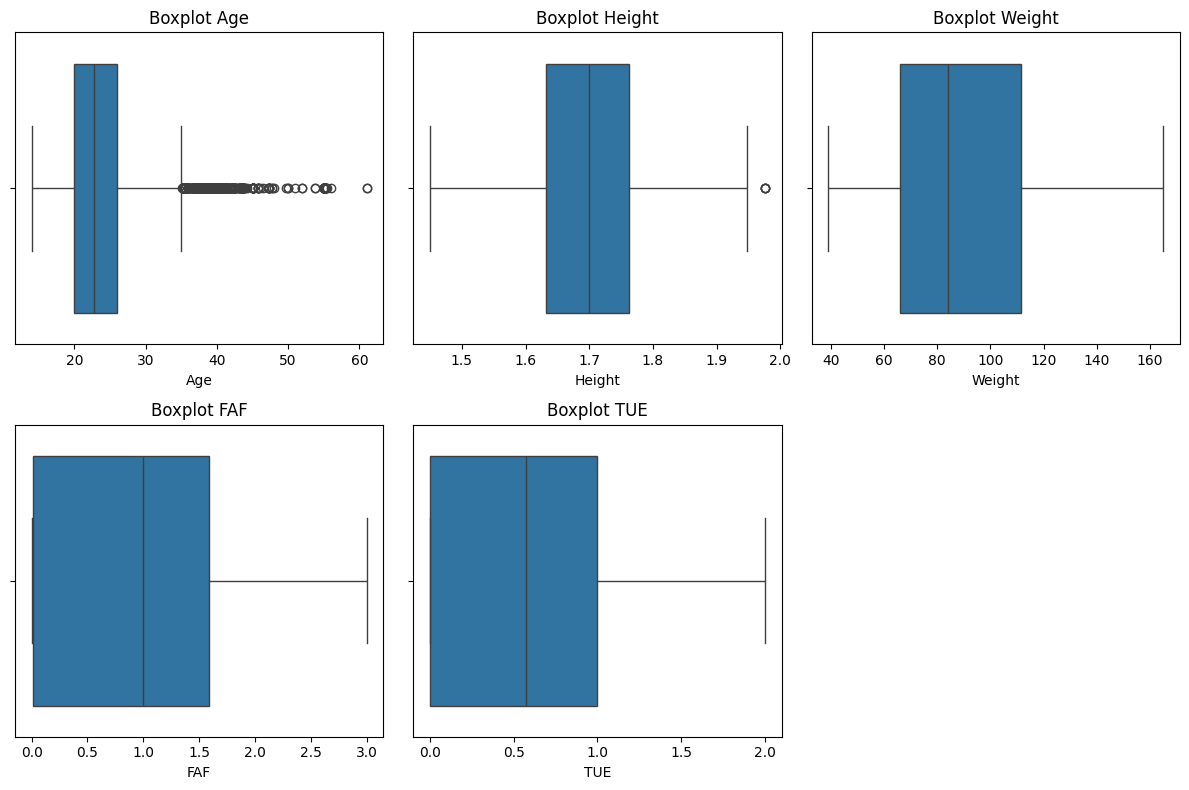

In [ ]:
# Deteksi Outlier dengan Boxplot
outlier_columns = ["Age", "Height", "Weight", "FAF", "TUE"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Menangani Outlier dengan IQR Method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [ ]:
# Terapkan IQR untuk kolom yang bermasalah
for col in outlier_columns:
    df = remove_outliers(df, col)

In [ ]:
print("\nDataset setelah membersihkan outlier:")
print(df.describe())
print(f"Jumlah baris setelah menghapus outlier: {len(df)}")


Dataset setelah membersihkan outlier:
                 id           Age        Height        Weight  \
count  19680.000000  19680.000000  19680.000000  19680.000000   
mean   10381.484909     22.952688      1.703039     88.008382   
std     5988.687099      4.211124      0.085939     26.817422   
min        0.000000     14.000000      1.450000     39.000000   
25%     5193.750000     19.747521      1.633491     65.000000   
50%    10395.500000     22.000000      1.700000     85.000000   
75%    15558.250000     25.986368      1.764138    111.829957   
max    20757.000000     35.000000      1.947406    165.057269   

       family_history_with_overweight          FAVC          FCVC  \
count                    19680.000000  19680.000000  19680.000000   
mean                         0.812957      0.913618      2.454246   
std                          0.389956      0.280935      0.537688   
min                          0.000000      0.000000      1.000000   
25%                          1

## Dataset encoded Saja

In [ ]:
# prompt: buatkan Encoding Variabel Kategorikal saja

from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal yang ingin di-encode
categorical_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', '0be1dad'] # Ganti dengan nama kolom kategorikal Anda

# Buat salinan dataframe agar tidak mengubah dataframe asli
df_encoded_only = df.copy()

# Lakukan encoding menggunakan LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_only[col] = le.fit_transform(df_encoded_only[col])

# Tampilkan beberapa baris pertama setelah encoding
print("\n--- Dataframe Setelah Encoding Variabel Kategorikal ---")
print(df_encoded_only.head())


--- Dataframe Setelah Encoding Variabel Kategorikal ---
   id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     3      0   
1                               1     1  2.000000  3.000000     2      0   
2                               1     1  1.880534  1.411685     3      0   
3                               1     1  3.000000  3.000000     3      0   
4                               1     1  2.679664  1.971472     3      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  0be1dad  
0  2.763573    0  0.000000  0.976473     2       3        6  
1  2.000000    0  1.000000  1.000000     0       0        0  

## Dataset standarisasi/scaling Saja

In [ ]:
# prompt: buatkan normalisasi data saja

from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik yang ingin dinormalisasi
numerical_cols = [
    'Age', 'Height', 'Weight', 'family_history_with_overweight',
    'FAVC',
    'FCVC',
    'NCP',
    'SMOKE',
    'CH2O',
    'SCC',
    'FAF',
    'TUE'
]

# Buat salinan dari DataFrame asli untuk menyimpan data yang distandardisasi
df_standardized = df.copy()

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan normalisasi pada kolom numerik di DataFrame baru
df_standardized[numerical_cols] = scaler.fit_transform(df_standardized[numerical_cols])

# Tampilkan beberapa baris pertama dari DataFrame yang distandardisasi
print("DataFrame setelah normalisasi:")
print(df_standardized.head())

# Sekarang, df asli tetap tidak berubah dan bisa digunakan untuk menghitung BMI
# Anda bisa melanjutkan dengan kode perhitungan BMI menggunakan df
# df['BMI'] = df['Weight']/(df['Height']**2)

DataFrame setelah normalisasi:
   id  Gender       Age    Height    Weight  family_history_with_overweight  \
0   0    Male  0.497286  0.502604  0.338497                             1.0   
1   1  Female  0.190476  0.221147  0.142792                             1.0   
2   2  Female  0.190476  0.525647  0.088577                             1.0   
3   3  Female  0.331083  0.524179  0.732007                             1.0   
4   4    Male  0.840051  0.933214  0.434708                             1.0   

   FAVC      FCVC       NCP        CAEC  SMOKE      CH2O  SCC       FAF  \
0   1.0  0.500000  0.661099   Sometimes    0.0  0.881787  0.0  0.000000   
1   1.0  0.500000  0.666667  Frequently    0.0  0.500000  0.0  0.333333   
2   1.0  0.440267  0.137228   Sometimes    0.0  0.455189  0.0  0.288682   
3   1.0  1.000000  0.666667   Sometimes    0.0  0.337031  0.0  0.489288   
4   1.0  0.839832  0.323824   Sometimes    0.0  0.489924  0.0  0.655991   

        TUE       CALC                 MTRA

## Dataset standarisasi + encoded

In [ ]:
# prompt: buatkan Encoding Variabel Kategorikal dan standardisasi dalam bersamaan

from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal yang ingin di-encode
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', '0be1dad'] # Ganti dengan nama kolom kategorikal Anda

# Buat salinan dataframe standarsisasi agar tidak mengubah dataframe asli
df_encoded_standardized = df_standardized.copy()

# Lakukan encoding menggunakan LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_standardized[col] = le.fit_transform(df_encoded_standardized[col])

# Tampilkan beberapa baris pertama setelah encoding
print("\n--- Dataframe Setelah Encoding Variabel Kategorikal ---")
print(df_encoded_standardized.head())


--- Dataframe Setelah Encoding Variabel Kategorikal ---
   id  Gender       Age    Height    Weight  family_history_with_overweight  \
0   0       1  0.497286  0.502604  0.338497                               1   
1   1       0  0.190476  0.221147  0.142792                               1   
2   2       0  0.190476  0.525647  0.088577                               1   
3   3       0  0.331083  0.524179  0.732007                               1   
4   4       1  0.840051  0.933214  0.434708                               1   

   FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0     1  0.500000  0.661099     3      0  0.881787    0  0.000000  0.488237   
1     1  0.500000  0.666667     2      0  0.500000    0  0.333333  0.500000   
2     1  0.440267  0.137228     3      0  0.455189    0  0.288682  0.836792   
3     1  1.000000  0.666667     3      0  0.337031    0  0.489288  0.390099   
4     1  0.839832  0.323824     3      0  0.489924    0  0.655991  0.4658

## Dataset standarisasi + encoded Tanpa Kolom ID

### Note

prompt : pertanyaan tambahan apakah kolom id discaling juga?

Tidak, kolom ID tidak boleh di-scaling dan bahkan tidak boleh dimasukkan sebagai fitur untuk melatih model sama sekali.

Kolom ID hanyalah sebuah pengenal unik untuk setiap baris data (seperti nomor KTP atau nomor induk siswa). Nilainya tidak memiliki hubungan atau korelasi apapun dengan tingkat obesitas atau fitur lainnya.

Memasukkan kolom ID ke dalam model hanya akan menambahkan 'kebisingan' (noise) dan bisa membuat model Anda bingung atau bahkan overfitting karena mencoba menghafal ID tertentu. Sebelum melatih model, kolom ID seharusnya sudah dibuang dari daftar fitur (X).


### Kodenya

Asumsi: Nama kolom ID Anda adalah 'id'. Jika namanya berbeda (misalnya, 'user_id' atau lainnya), cukup ganti 'id' di dalam kode di bawah ini.

Cara 1: Membuat DataFrame Baru (Paling Aman dan Direkomendasikan)
Cara ini akan membuat salinan baru dari DataFrame Anda tanpa kolom ID, sementara df_encoded asli tetap tidak berubah. Ini lebih aman jika Anda mungkin perlu mengakses kembali data aslinya.

In [ ]:
# Membuat dataframe baru bernama 'df_encoded_standardized_no_id' yang tidak lagi memiliki kolom 'ID'
df_encoded_standardized_no_id = df_encoded_standardized.drop('id', axis=1)

# Verifikasi dengan melihat 5 baris pertama dari dataframe baru
print("DataFrame baru setelah kolom ID dihapus:")
print(df_encoded_standardized_no_id.head())

DataFrame baru setelah kolom ID dihapus:
   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       1  0.497286  0.502604  0.338497                               1     1   
1       0  0.190476  0.221147  0.142792                               1     1   
2       0  0.190476  0.525647  0.088577                               1     1   
3       0  0.331083  0.524179  0.732007                               1     1   
4       1  0.840051  0.933214  0.434708                               1     1   

       FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0  0.500000  0.661099     3      0  0.881787    0  0.000000  0.488237     2   
1  0.500000  0.666667     2      0  0.500000    0  0.333333  0.500000     0   
2  0.440267  0.137228     3      0  0.455189    0  0.288682  0.836792     0   
3  1.000000  0.666667     3      0  0.337031    0  0.489288  0.390099     2   
4  0.839832  0.323824     3      0  0.489924    0  0.655991  0.465861     2  

In [ ]:
# Membuat dataframe baru bernama 'df_encoded_no_id' yang tidak lagi memiliki kolom 'ID'
df_encoded_no_id = df_encoded_only.drop('id', axis=1)

# Verifikasi dengan melihat 5 baris pertama dari dataframe baru
print("DataFrame baru setelah kolom ID dihapus:")
print(df_encoded_no_id.head())

DataFrame baru setelah kolom ID dihapus:
   Gender        Age    Height      Weight  family_history_with_overweight  \
0       1  24.443011  1.699998   81.669950                               1   
1       0  18.000000  1.560000   57.000000                               1   
2       0  18.000000  1.711460   50.165754                               1   
3       0  20.952737  1.710730  131.274851                               1   
4       1  31.641081  1.914186   93.798055                               1   

   FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0     1  2.000000  2.983297     3      0  2.763573    0  0.000000  0.976473   
1     1  2.000000  3.000000     2      0  2.000000    0  1.000000  1.000000   
2     1  1.880534  1.411685     3      0  1.910378    0  0.866045  1.673584   
3     1  3.000000  3.000000     3      0  1.674061    0  1.467863  0.780199   
4     1  2.679664  1.971472     3      0  1.979848    0  1.967973  0.931721   

   CALC  MTRANS

# 2. EDA

In [ ]:
# Menampilkan informasi dasar
print("\n--- Info Dataset ---")
df.info()
print("\n--- Statistik Deskriptif ---")
print(df.describe(include='all'))


--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
Index: 19680 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19680 non-null  int64  
 1   Gender                          19680 non-null  object 
 2   Age                             19680 non-null  float64
 3   Height                          19680 non-null  float64
 4   Weight                          19680 non-null  float64
 5   family_history_with_overweight  19680 non-null  int64  
 6   FAVC                            19680 non-null  int64  
 7   FCVC                            19680 non-null  float64
 8   NCP                             19680 non-null  float64
 9   CAEC                            19680 non-null  object 
 10  SMOKE                           19680 non-null  int64  
 11  CH2O                            19680 non-null  float64
 12  SCC            

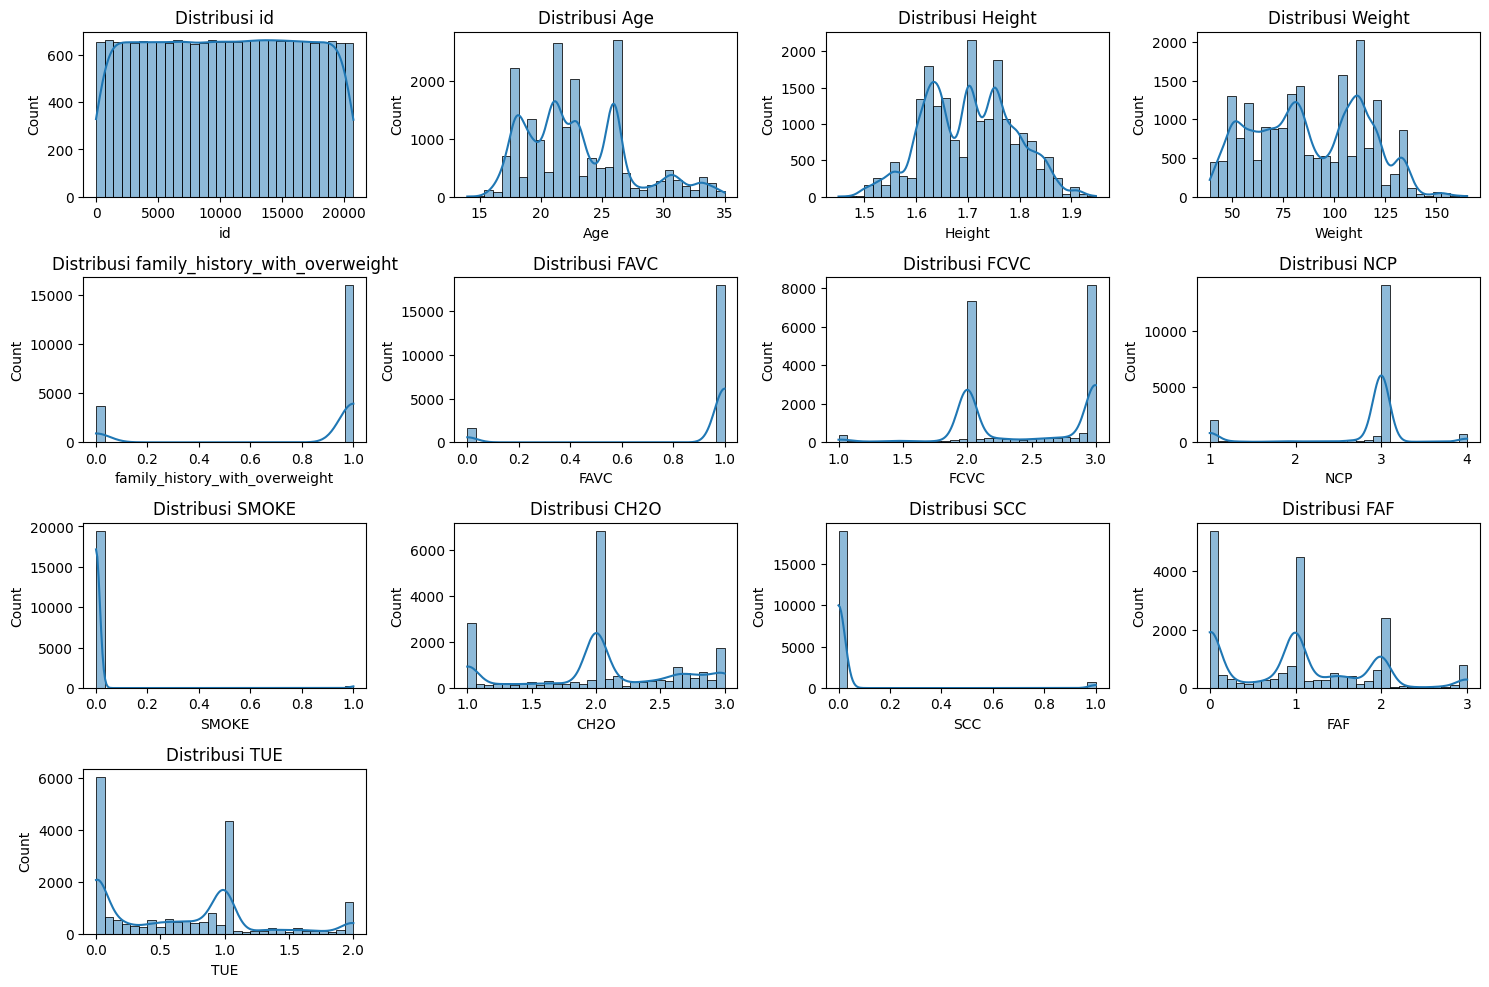

In [ ]:
# Visualisasi distribusi data numerik
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

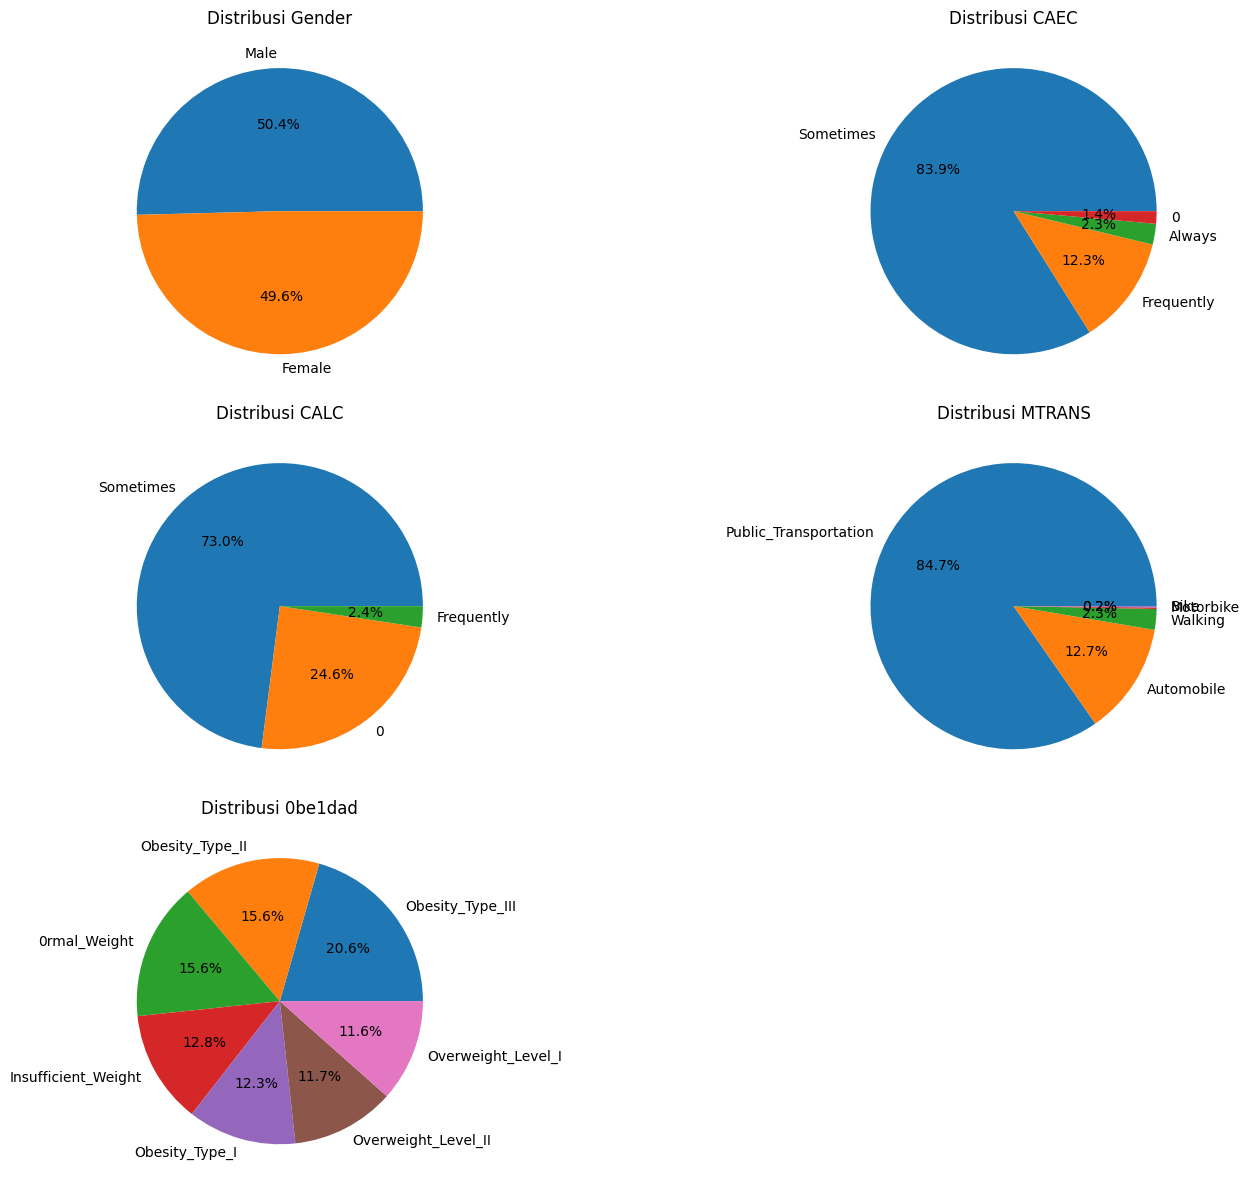

In [ ]:
# prompt: minta visualisasi data dalam bentuk piechart untuk gender, CAEC, CALC, MTRANS, 0be1dad

# Visualisasi data dalam bentuk pie chart untuk kolom-kolom yang diminta
columns_to_plot = ['Gender', 'CAEC', 'CALC', 'MTRANS', '0be1dad']

plt.figure(figsize=(15, 12))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribusi {col}')
    plt.ylabel('')  # Hapus label y-axis

plt.tight_layout()
plt.show()


# 2.1 Visualisasi Data

Jumlah masing-masing gender:
Gender
Male      9921
Female    9759
Name: count, dtype: int64


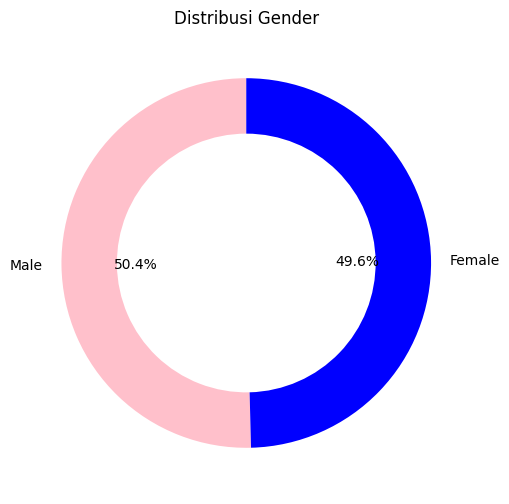

Distribusi Gender (Persentase):
Gender
Male      50.411585
Female    49.588415
Name: count, dtype: float64


In [ ]:
# Menghitung distribusi gender
gender_counts = df['Gender'].value_counts()

# Menampilkan jumlah masing-masing gender
print("Jumlah masing-masing gender:")
print(gender_counts)

# Donut chart untuk distribusi gender
plt.figure(figsize=(8,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'blue'], wedgeprops={'width': 0.3})
plt.title('Distribusi Gender')
plt.show()

# Menampilkan analisis distribusi gender
gender_distribution = gender_counts / gender_counts.sum() * 100  # Persentase distribusi gender
print("Distribusi Gender (Persentase):")
print(gender_distribution)

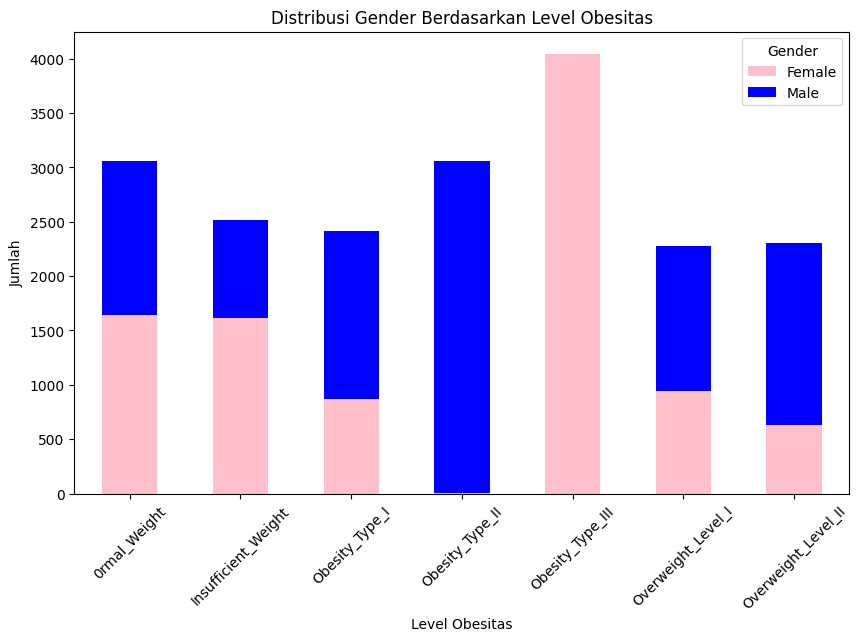

In [ ]:
# Stacked bar chart for Gender distribution by Obesity level
gender_obesity = pd.crosstab(df['0be1dad'], df['Gender'])
gender_obesity.plot(kind='bar', stacked=True, color=['pink', 'blue'], figsize=(10,6))
plt.title('Distribusi Gender Berdasarkan Level Obesitas')
plt.xlabel('Level Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()




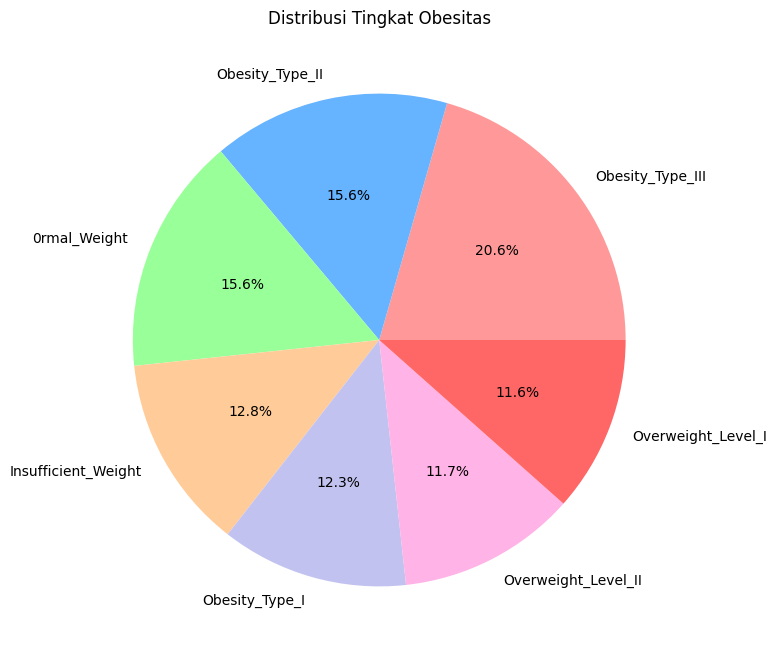

In [ ]:
# Distribusi kategori obesitas
plt.figure(figsize=(8,8))
df['0be1dad'].value_counts().plot.pie(autopct='%1.1f%%',
                                      colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ff6666'])
plt.title('Distribusi Tingkat Obesitas')
plt.ylabel('')
plt.show()

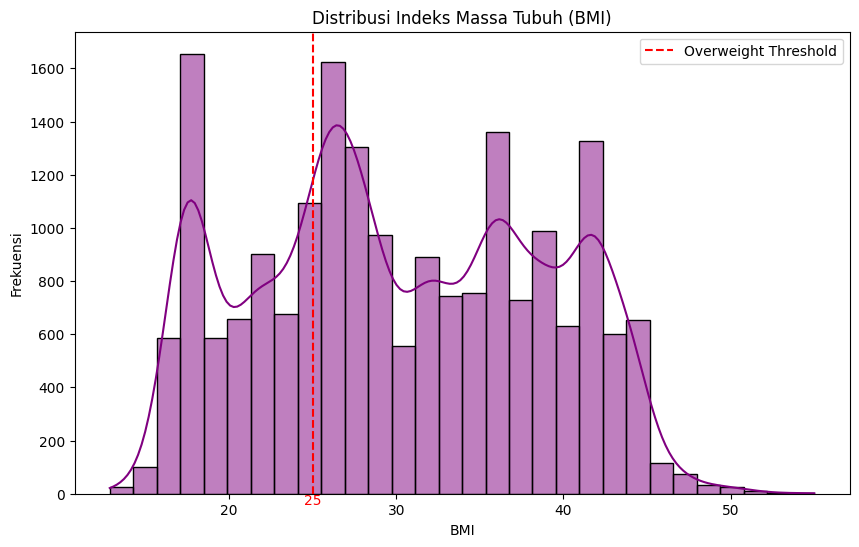

In [ ]:
# Hitung BMI
df['BMI'] = df['Weight']/(df['Height']**2)

plt.figure(figsize=(10,6))
sns.histplot(df['BMI'], bins=30, kde=True, color='purple')
plt.title('Distribusi Indeks Massa Tubuh (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.axvline(x=25, color='red', linestyle='--', label='Overweight Threshold')
plt.text(25, plt.ylim()[0], '25', color='red', ha='center', va='top')
plt.legend()
plt.show()

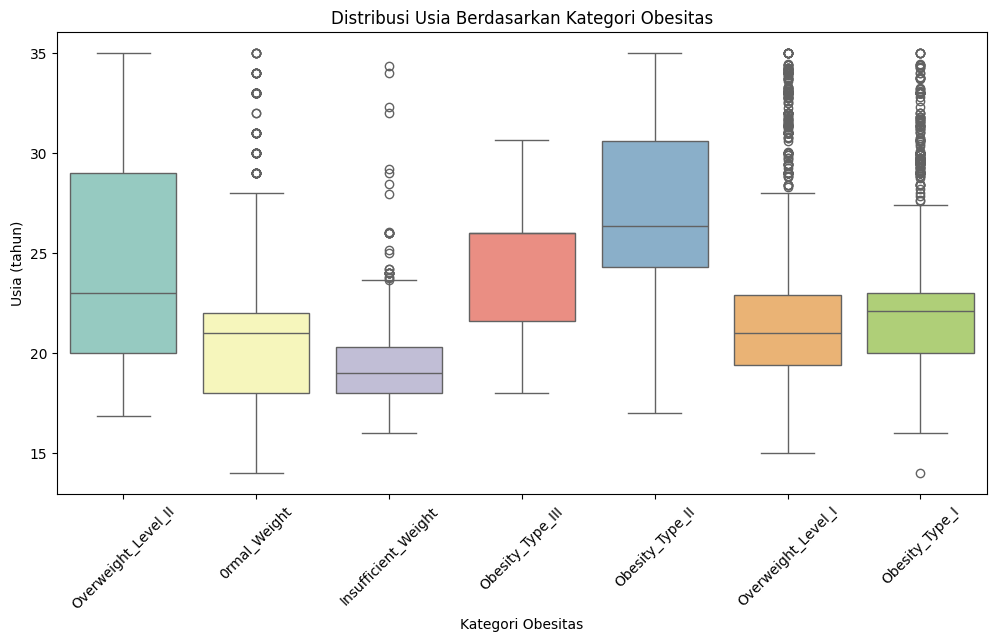

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='0be1dad', y='Age', data=df, palette='Set3')
plt.title('Distribusi Usia Berdasarkan Kategori Obesitas')
plt.xticks(rotation=45)
plt.xlabel('Kategori Obesitas')
plt.ylabel('Usia (tahun)')
plt.show()

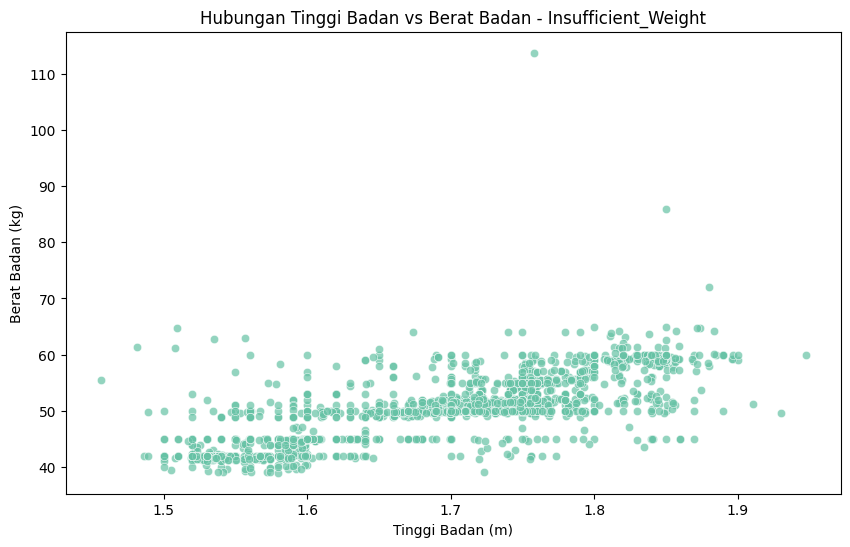

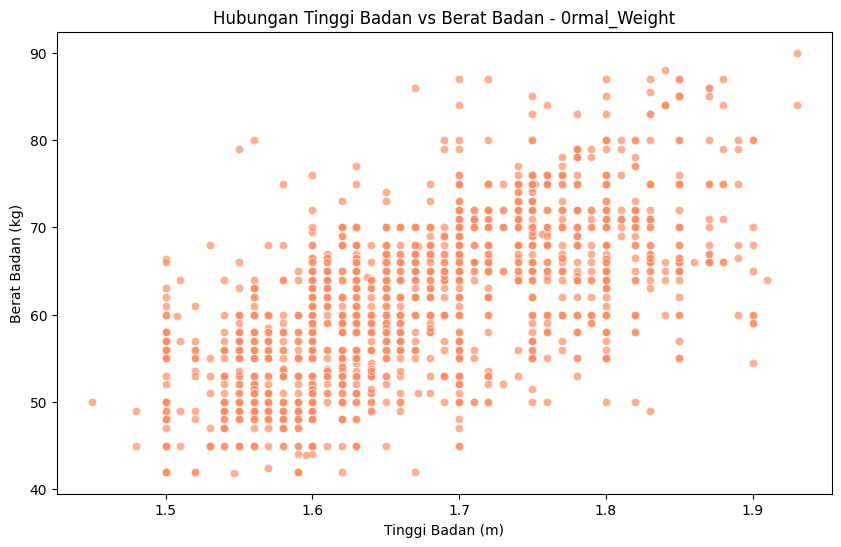

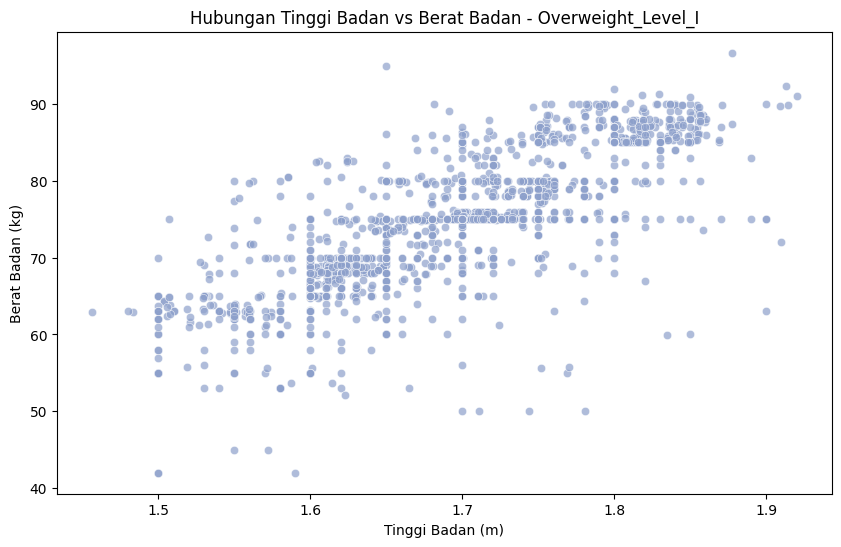

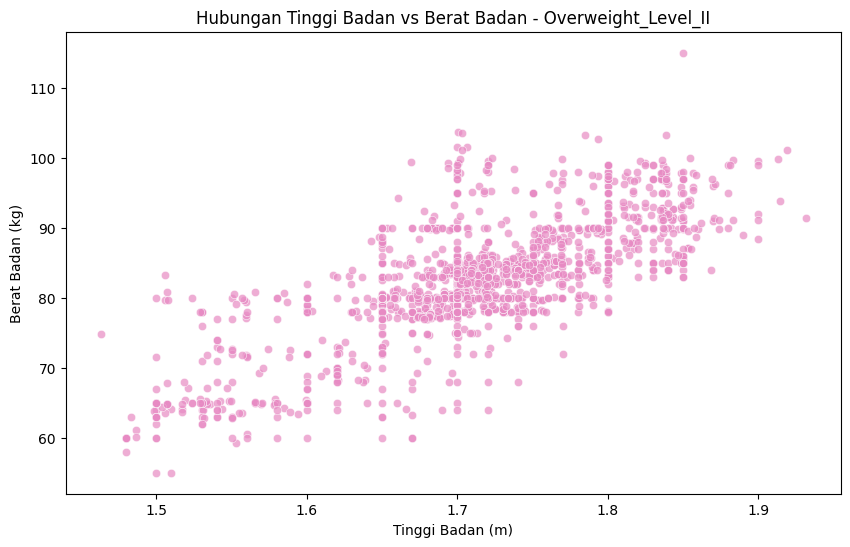

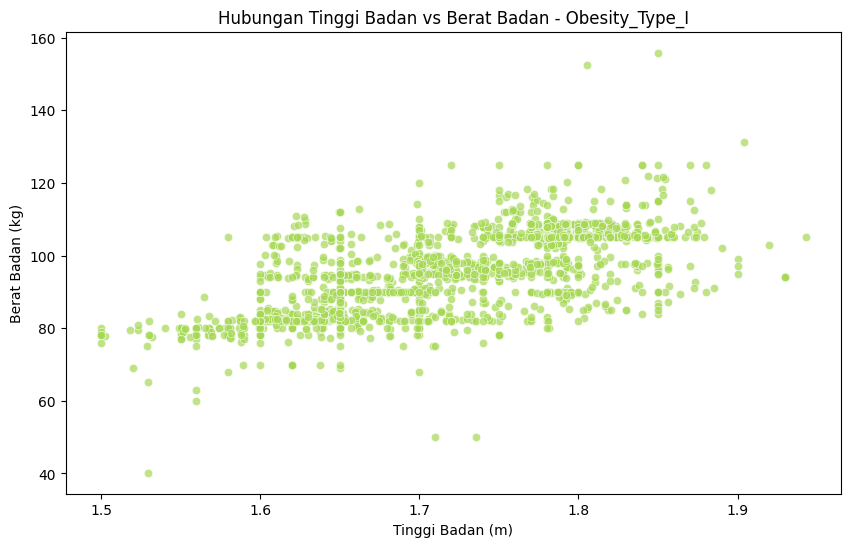

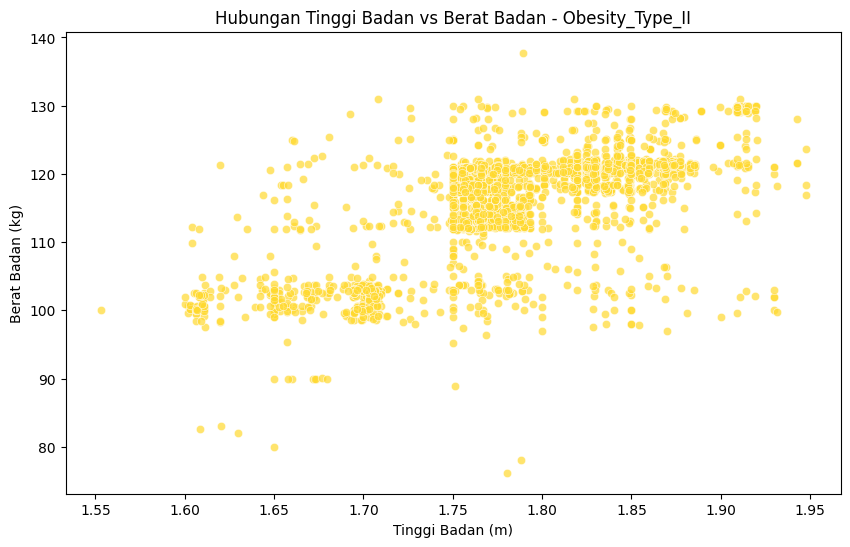

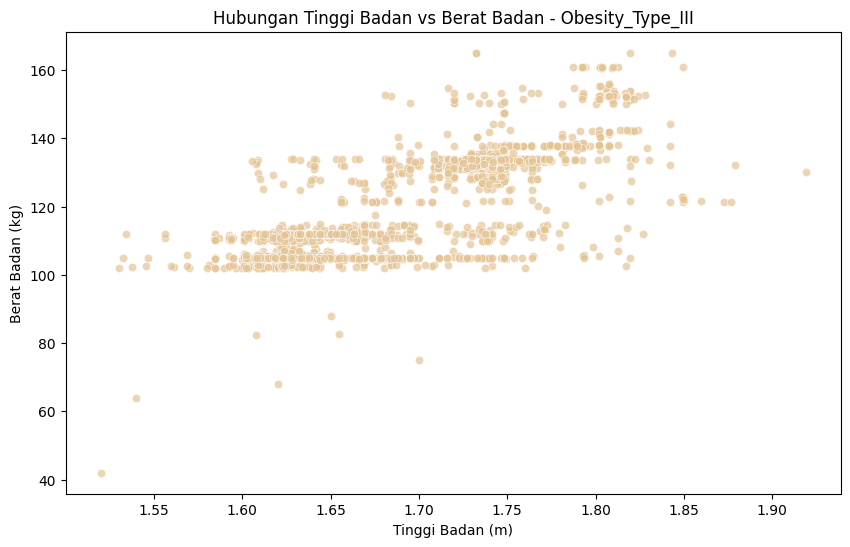

In [ ]:
# Define the order of the obesity levels
obesity_order = ['Insufficient_Weight', '0rmal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Create a color palette for the plots
palette = sns.color_palette("Set2", len(obesity_order))

# Create scatter plots for each obesity level, ordered and with different colors
for i, level in enumerate(obesity_order):
    plt.figure(figsize=(10,6))
    subset = df[df['0be1dad'] == level]
    sns.scatterplot(x='Height', y='Weight', data=subset, color=palette[i], alpha=0.7)
    plt.title(f'Hubungan Tinggi Badan vs Berat Badan - {level}')
    plt.xlabel('Tinggi Badan (m)')
    plt.ylabel('Berat Badan (kg)')
    plt.show()

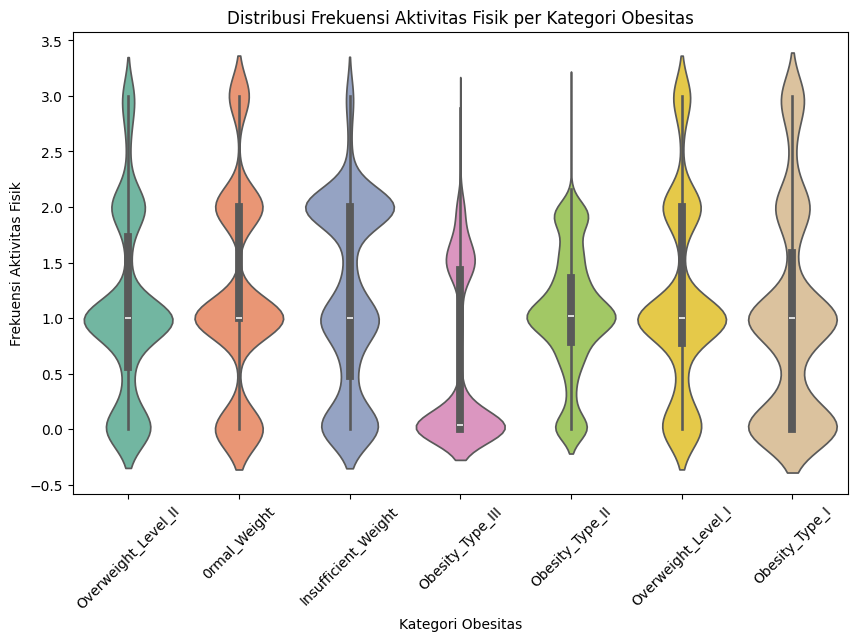

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='0be1dad', y='FAF', data=df, palette='Set2')
plt.title('Distribusi Frekuensi Aktivitas Fisik per Kategori Obesitas')
plt.xticks(rotation=45)
plt.xlabel('Kategori Obesitas')
plt.ylabel('Frekuensi Aktivitas Fisik')
plt.show()

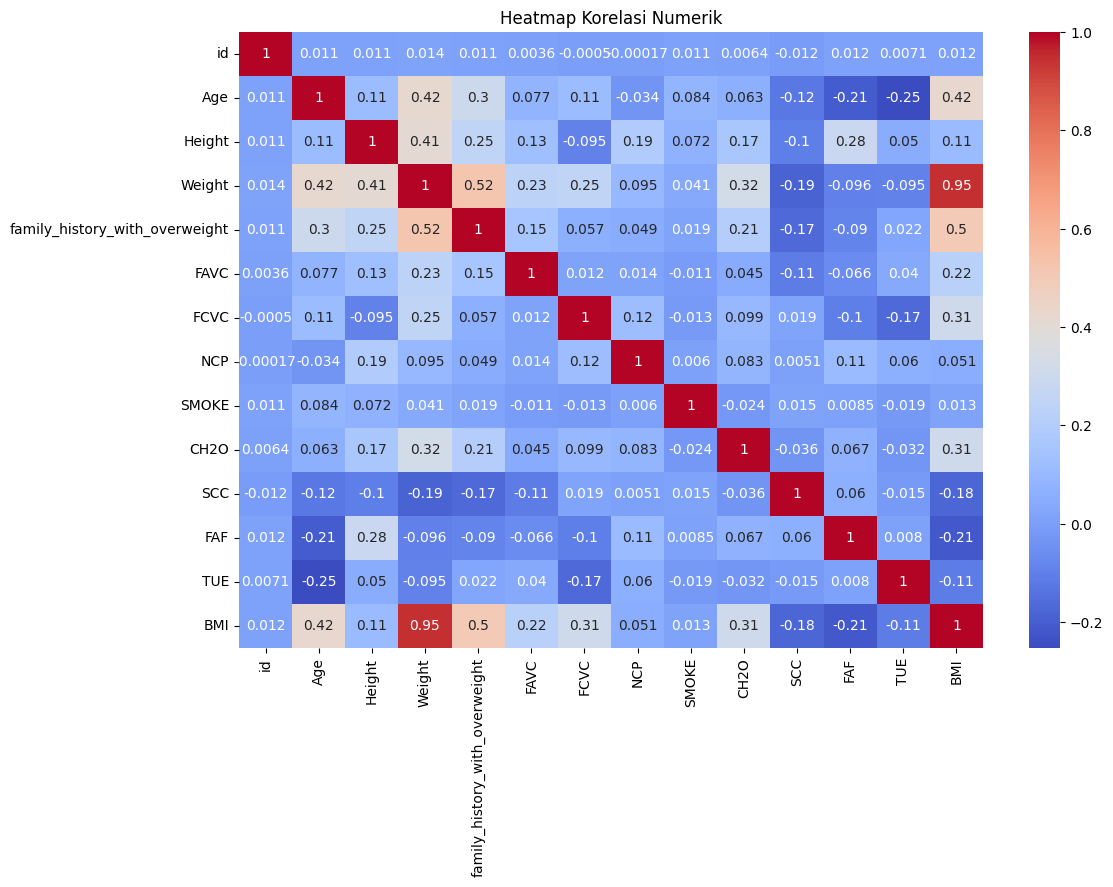

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Numerik')
plt.show()

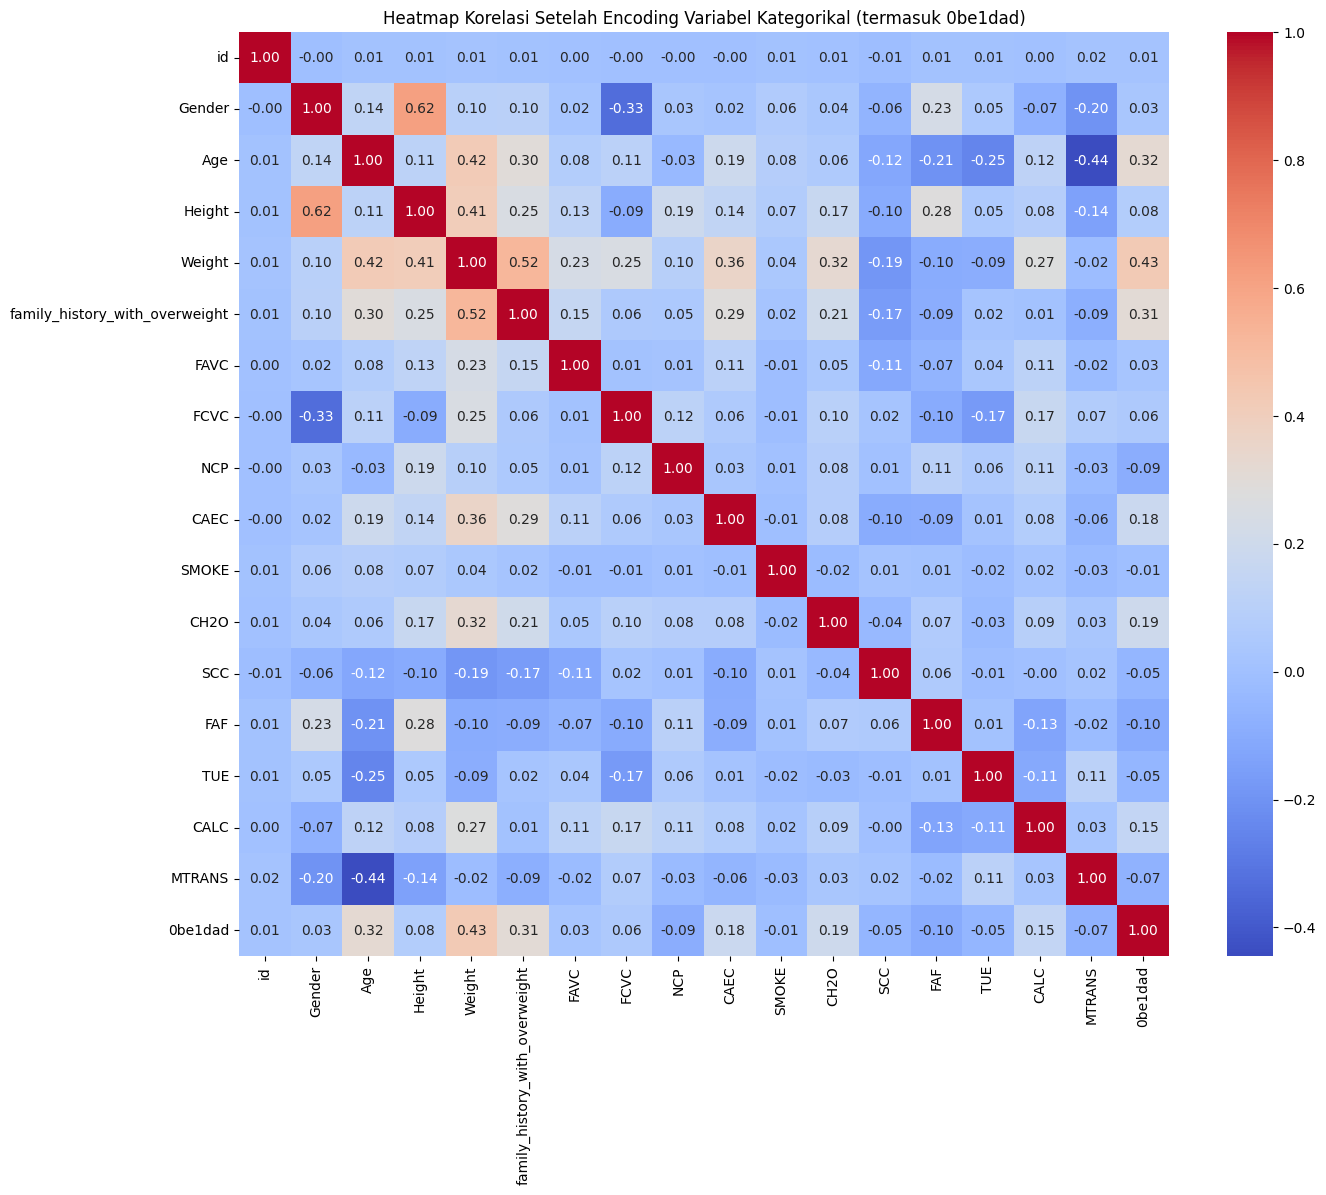

In [ ]:
# prompt: tolong buatkan heatmap dengan tambahan variabel 0be1dad (Target variable representing obesity level) yang sudah di encoding

# Menghitung matriks korelasi pada dataframe yang sudah di-encode
correlation_matrix_encoded = df_encoded_only.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Setelah Encoding Variabel Kategorikal (termasuk 0be1dad)')
plt.show()

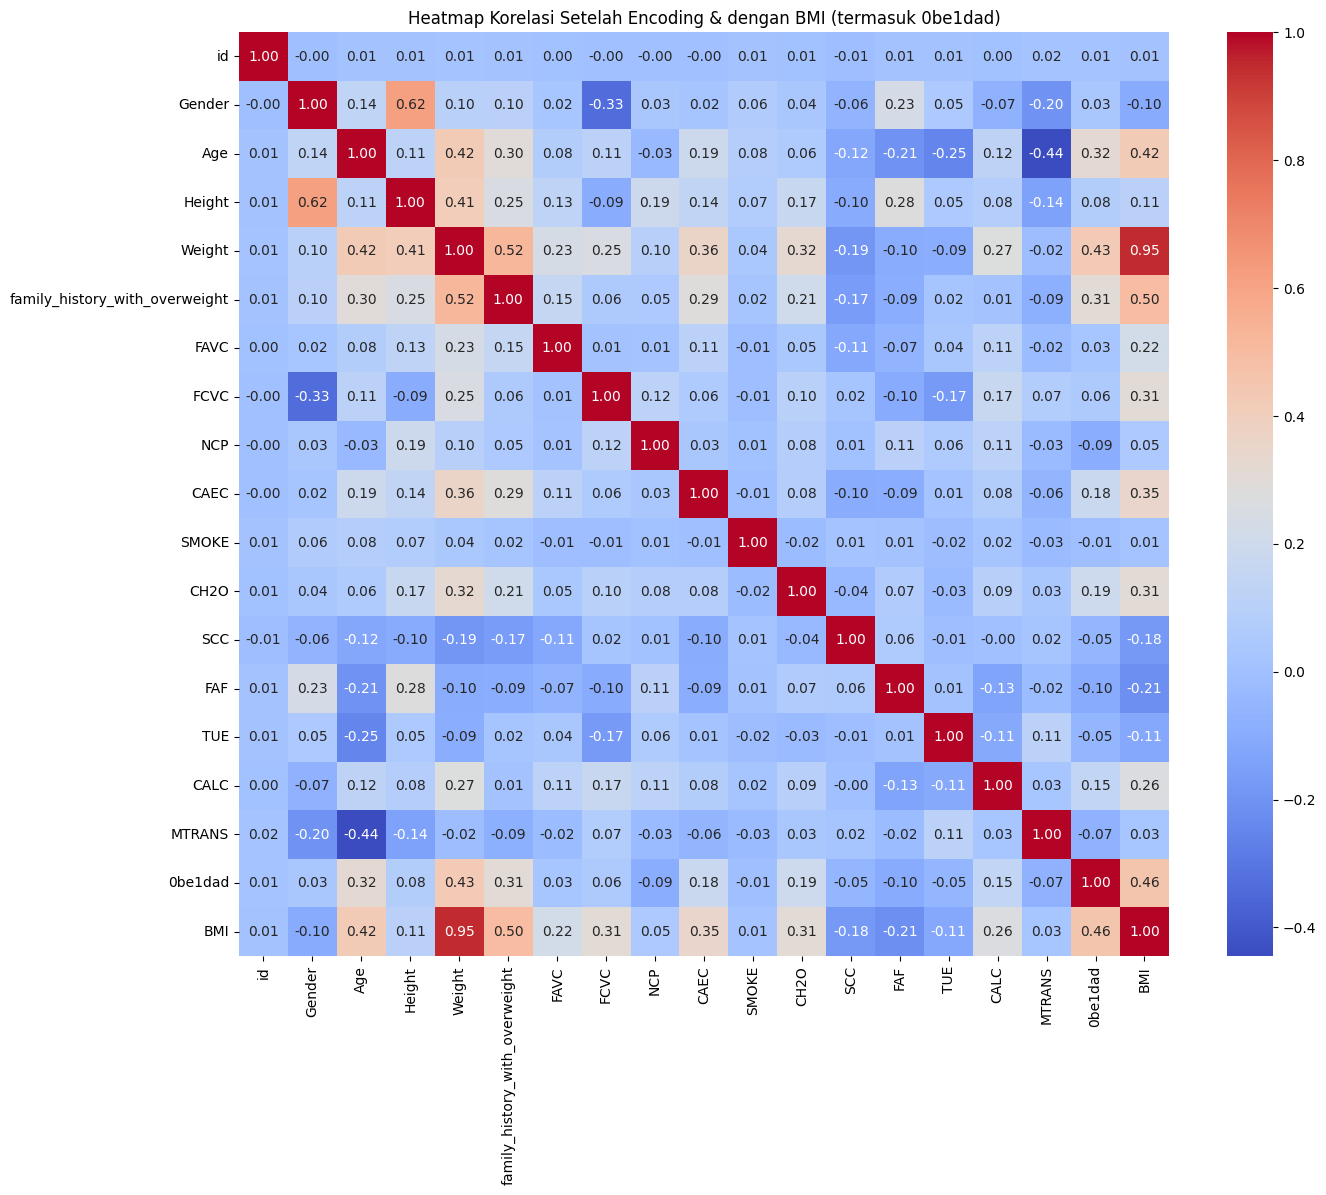

In [ ]:
# Hitung BMI di DataFrame asli (sebelum encoding variabel kategorikal)
df['BMI'] = df['Weight']/(df['Height']**2)

# Sekarang, df_encoded sudah dibuat sebelumnya dan berisi variabel kategorikal yang di-encode.
# Pastikan df_encoded juga mencerminkan perubahan pada df (misalnya, penambahan kolom BMI)
# Jika df_encoded dibuat dari df.copy(), maka perubahan pada df setelah copy tidak otomatis ada di df_encoded.
# Kita perlu menambahkan kolom BMI ke df_encoded secara manual atau memastikan df_encoded dibuat setelah BMI dihitung.

# Asumsi df_encoded dibuat setelah langkah-langkah pembersihan dan penambahan BMI pada df
# Jika tidak, Anda mungkin perlu menambahkan baris berikut:
if 'BMI' not in df_encoded_only.columns:
    # Menambahkan kolom BMI ke df_encoded
    # Perlu diperhatikan jika data di df_encoded sudah distandardisasi,
    # BMI juga harus distandardisasi jika ingin disertakan dalam analisis korelasi yang distandardisasi.
    # Untuk heatmap korelasi, kita biasanya menggunakan nilai asli atau ter-encode.
    # Mari kita tambahkan nilai BMI asli ke df_encoded sebelum menghitung korelasi.
    df_encoded_only['BMI'] = df['BMI'] # Menambahkan kolom BMI dari df asli

# Menghitung matriks korelasi pada dataframe yang sudah di-encode (dan sekarang termasuk BMI)
correlation_matrix_encoded = df_encoded_only.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Setelah Encoding & dengan BMI (termasuk 0be1dad)')
plt.show()

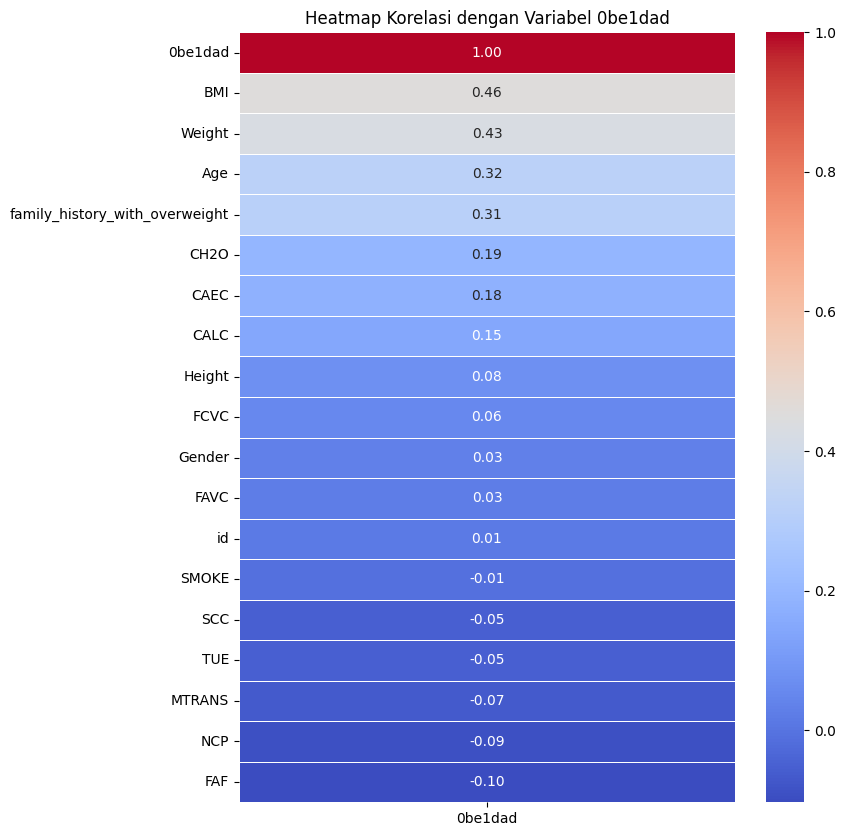

In [ ]:
# prompt: coba buat matrix heatmap hanya kolom 0be1dad saja yang berkoralasi dengan variabel lainnya

# Filter the correlation matrix to show only the correlations with '0be1dad'
correlation_with_target = correlation_matrix_encoded[['0be1dad']].sort_values(by='0be1dad', ascending=False)

# Create a heatmap for the correlations with '0be1dad'
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi dengan Variabel 0be1dad')
plt.show()


# 3. Machine Learning

## 3.1 Random Forest

### 3.1.1 Data train & Modelling Random Forest

1. Pisahkan Fitur (X) dan Target (y)
Anda perlu memisahkan dataset Anda menjadi dua bagian: variabel independen (fitur) yang akan digunakan untuk memprediksi, dan variabel dependen (target) yang ingin Anda prediksi.

In [ ]:
#pakai dataset yang sudah diencode
# Asumsikan '0be1dad' adalah nama kolom target Anda yang sudah di-encode
X = df_encoded_standardized_no_id.drop('0be1dad', axis=1) # Semua kolom kecuali target
y = df_encoded_no_id['0be1dad']              # Hanya kolom target

# Catatan: Sangat direkomendasikan untuk tidak men-scaling variabel target (y)

2. Bagi Data Menjadi Data Latih dan Data Uji
Ini adalah langkah krusial untuk mengevaluasi seberapa baik model Anda. Kita akan menggunakan 80% data untuk melatih model dan 20% untuk mengujinya.


*   test_size=0.2: Mengalokasikan 20% data untuk pengujian.
*   random_state=42: Memastikan pembagian data selalu sama setiap kali kode dijalankan.

*   stratify=y: Memastikan proporsi setiap kelas target di data latih dan data uji sama dengan proporsi di data asli (sangat direkomendasikan untuk klasifikasi).


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Jalankan ini untuk mendapatkan daftar kolom dengan urutan yang pasti benar
correct_feature_order = list(X_train.columns)

# Cetak hasilnya
print("Urutan kolom yang benar untuk feature_order adalah:")
print(correct_feature_order)

Urutan kolom yang benar untuk feature_order adalah:
['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


3. Buat dan Latih Model Random Forest
Sekarang, kita akan membuat objek model Random Forest dan melatihnya menggunakan data latih.

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

# 1. Membuat objek model (bisa dimulai dengan parameter default)
#rf_model = RandomForestClassifier(random_state=42)

# 2. Melatih model dengan data latih
#rf_model.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Latih ulang model dengan parameter yang lebih ringan
rf_model = RandomForestClassifier(
    n_estimators=50,    # Kurangi dari nilai sebelumnya
    max_depth=15,       # Batasi kedalaman pohon
    random_state=42,
    n_jobs=-1           # Gunakan semua core CPU agar lebih cepat
)

# Latih seperti biasa
rf_model.fit(X_train, y_train)

# Jangan lupa evaluasi kembali akurasinya untuk memastikan tidak turun drastis
# ... (kode evaluasi di sini) ...

# Jika akurasi masih bagus, simpan model 'lite' ini
#import joblib
#joblib.dump(rf_model_lite, 'rf_model_lite.joblib')

RandomForestClassifier(max_depth=15, n_estimators=50, n_jobs=-1,
                       random_state=42)

Selesai! Anda kini memiliki model Random Forest yang sudah terlatih (rf_model). Langkah Anda selanjutnya adalah melakukan prediksi pada X_test dan mengevaluasi kinerjanya menggunakan y_test.

### 3.1.2 Prediksi Data Uji & Evaluasi

1. Lakukan Prediksi pada Data Uji
Kita akan menggunakan model yang sudah dilatih (rf_model) untuk memprediksi label dari X_test.

In [ ]:
# Melakukan prediksi pada data X_test
y_pred = rf_model.predict(X_test)

2. Evaluasi Kinerja Model
Kita akan membandingkan y_pred (hasil prediksi) dengan y_test (jawaban yang sebenarnya) menggunakan tiga metrik utama.

  a. Accuracy Score
  Ini adalah metrik paling sederhana, yaitu persentase prediksi yang benar.

  b. Classification Report
Laporan ini memberikan rincian yang lebih mendalam tentang kinerja model untuk setiap kelas target, termasuk:

* Precision: Dari semua yang diprediksi sebagai kelas A, berapa persen yang
benar-benar kelas A.
* Recall: Dari semua data yang seharusnya kelas A, berapa persen yang berhasil diprediksi sebagai kelas A.
* F1-score: Rata-rata harmonik dari Precision dan Recall.

untuk Evaluasi lengkapnya:

              EVALUASI LENGKAP - RANDOM FOREST
✅ Akurasi      : 89.66%
✅ Presisi (Avg): 88.38%
✅ Recall (Avg) : 88.23%
✅ F1-Score (Avg): 88.28%

✅ AUC Score    : 0.9863

Laporan Klasifikasi Rinci (per Kelas):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       613
           1       0.91      0.92      0.92       503
           2       0.89      0.88      0.88       483
           3       0.97      0.98      0.97       612
           4       0.99      1.00      1.00       809
           5       0.79      0.73      0.75       455
           6       0.79      0.80      0.80       461

    accuracy                           0.90      3936
   macro avg       0.88      0.88      0.88      3936
weighted avg       0.90      0.90      0.90      3936


Confusion Matrix:


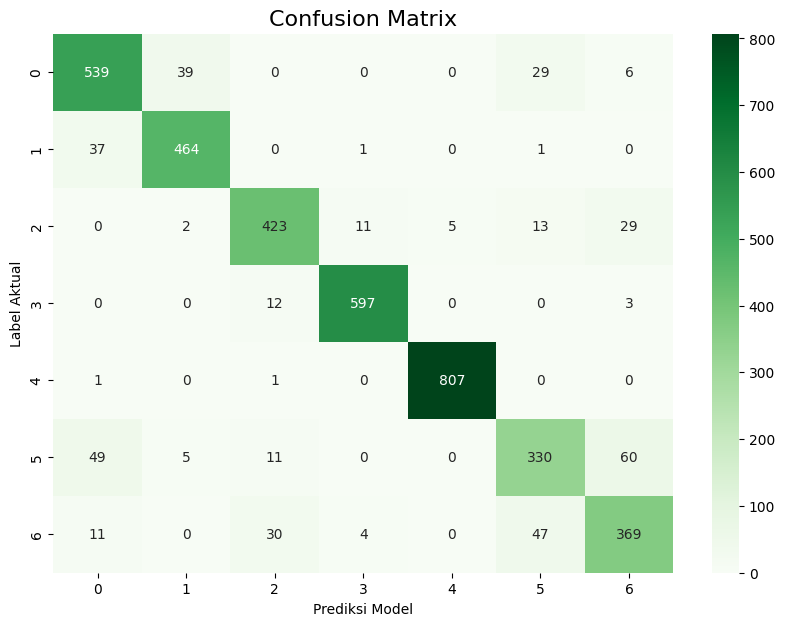

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             roc_auc_score,
                             precision_score,
                             recall_score,
                             f1_score)

# 1. LAKUKAN PREDIKSI (KELAS & PROBABILITAS)
# ==============================================================================
# Prediksi kelas (untuk akurasi, confusion matrix, dll.)
y_pred = rf_model.predict(X_test)

# Prediksi probabilitas (diperlukan untuk AUC)
y_pred_proba = rf_model.predict_proba(X_test)


# 2. EVALUASI KINERJA SECARA MENYELURUH
# ==============================================================================
print("="*60)
print("              EVALUASI LENGKAP - RANDOM FOREST")
print("="*60)

# a. Metrik Utama (Akurasi, Presisi, Recall, F1-Score)
# Parameter 'average='macro'' menghitung rata-rata metrik untuk setiap kelas
# tanpa memperhitungkan ketidakseimbangan kelas (setiap kelas dianggap sama pentingnya).
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Akurasi      : {accuracy:.2%}")
print(f"✅ Presisi (Avg): {precision:.2%}")
print(f"✅ Recall (Avg) : {recall:.2%}")
print(f"✅ F1-Score (Avg): {f1:.2%}\n")


# b. AUC Score (Area Under the ROC Curve)
# Untuk multi-kelas, kita perlu menentukan strategi, 'ovr' (one-vs-rest) adalah yang paling umum.
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print(f"✅ AUC Score    : {auc:.4f}\n")


# c. Laporan Klasifikasi Rinci per Kelas
print("Laporan Klasifikasi Rinci (per Kelas):")
print(classification_report(y_test, y_pred, zero_division=0))


# d. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Prediksi Model')
plt.ylabel('Label Aktual')
plt.show()

### 3.1.3 Visualisasi

Keterangan

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# GANTI 'nama_file.csv' dengan path ke file data asli Anda
# df_original = pd.read_csv('path/to/your/ObesityDataSet_raw_and_data_sinthetic.csv')
# ATAU jika Anda masih punya dataframe asli di memori, gunakan itu.
# Kita asumsikan df adalah dataframe dengan kolom target asli.

# 1. Buat instance LabelEncoder baru
check_encoder = LabelEncoder()

# 2. Latih encoder HANYA pada kolom target dari data asli Anda
# Ganti '0be1dad' jika nama kolom Anda berbeda
check_encoder.fit(df['0be1dad']) # Ganti df dengan nama dataframe asli Anda

# 3. Cetak atribut .classes_ untuk melihat urutannya
print("Urutan label yang benar adalah:")
print(list(check_encoder.classes_))

Urutan label yang benar adalah:
['0rmal_Weight', 'Insufficient_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


In [ ]:
# ==============================================================================
# 1. BUAT PEMETAAN LABEL YANG BENAR (SESUAI OUTPUT ANDA)
# ==============================================================================
# Urutan ini diambil dari output .classes_ yang Anda berikan
label_mapping = {
    0: 'Normal_Weight', # Diperbaiki dari '0rmal_Weight'
    1: 'Insufficient_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}

# --- Mengubah data numerik menjadi teks yang bisa dibaca ---
y_test_labels = pd.Series(y_test).map(label_mapping)
y_pred_labels = pd.Series(y_pred).map(label_mapping)


1. Perbandingan Distribusi Kelas (Actual vs. Predicted)
Visualisasi ini membantu kita melihat apakah distribusi atau sebaran kelas pada hasil prediksi model Anda mirip dengan distribusi pada data aslinya. Jika distribusinya sangat berbeda, ini bisa menjadi indikasi bahwa model Anda memiliki bias terhadap kelas tertentu.

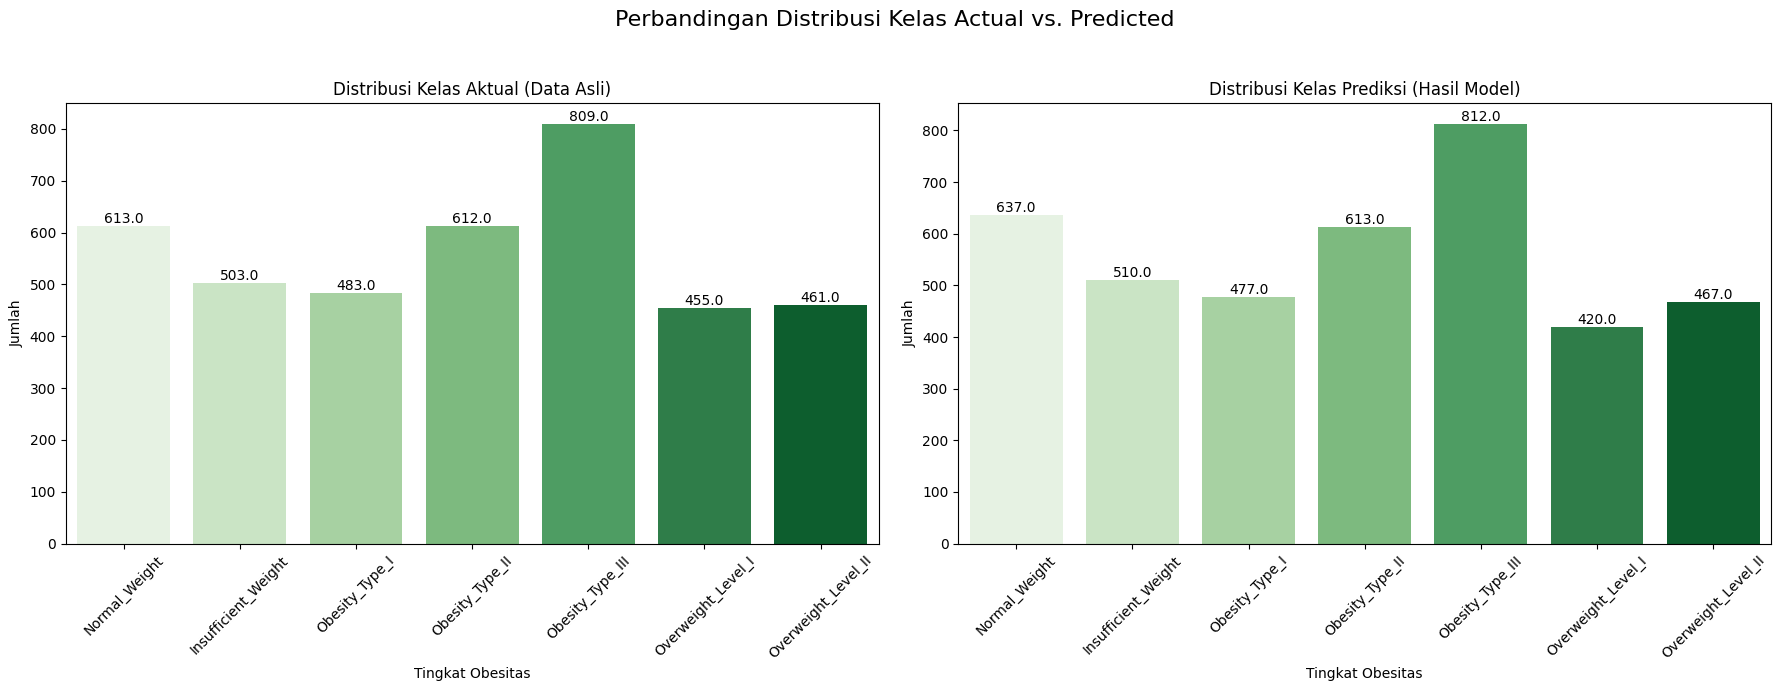

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Menentukan urutan kelas agar konsisten di kedua plot
# PERHATIKAN: Pastikan urutan ini sesuai dengan hasil .fit_transform()
# dari LabelEncoder Anda pada kolom 'NObeyesdad'.
order = list(label_mapping.values())

# Membuat figure dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Perbandingan Distribusi Kelas Actual vs. Predicted', fontsize=16)

# Plot untuk Distribusi Data Aktual (y_test_labels)
sns.countplot(ax=axes[0], x=y_test_labels, palette='Greens', order=order)
axes[0].set_title('Distribusi Kelas Aktual (Data Asli)')
axes[0].set_xlabel('Tingkat Obesitas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45) # Rotasi label agar tidak tumpang tindih
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Plot untuk Distribusi Data Prediksi (y_pred_labels)
sns.countplot(ax=axes[1], x=y_pred_labels, palette='Greens', order=order)
axes[1].set_title('Distribusi Kelas Prediksi (Hasil Model)')
axes[1].set_xlabel('Tingkat Obesitas')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

2. Peta Kesalahan Prediksi pada Fitur Asli
Ini adalah visualisasi yang lebih canggih. Tujuannya adalah untuk melihat di mana model Anda membuat kesalahan berdasarkan fitur-fitur tertentu. Kita akan membuat scatter plot dari dua fitur paling berpengaruh (misalnya, Weight dan Age) dan memberi warna pada setiap titik data berdasarkan:
* Label aslinya (y_test).
* Label prediksinya (y_pred).

  Dengan membandingkan kedua plot ini, Anda bisa melihat secara visual titik mana saja yang warnanya berubah (artinya, salah diklasifikasikan oleh model).

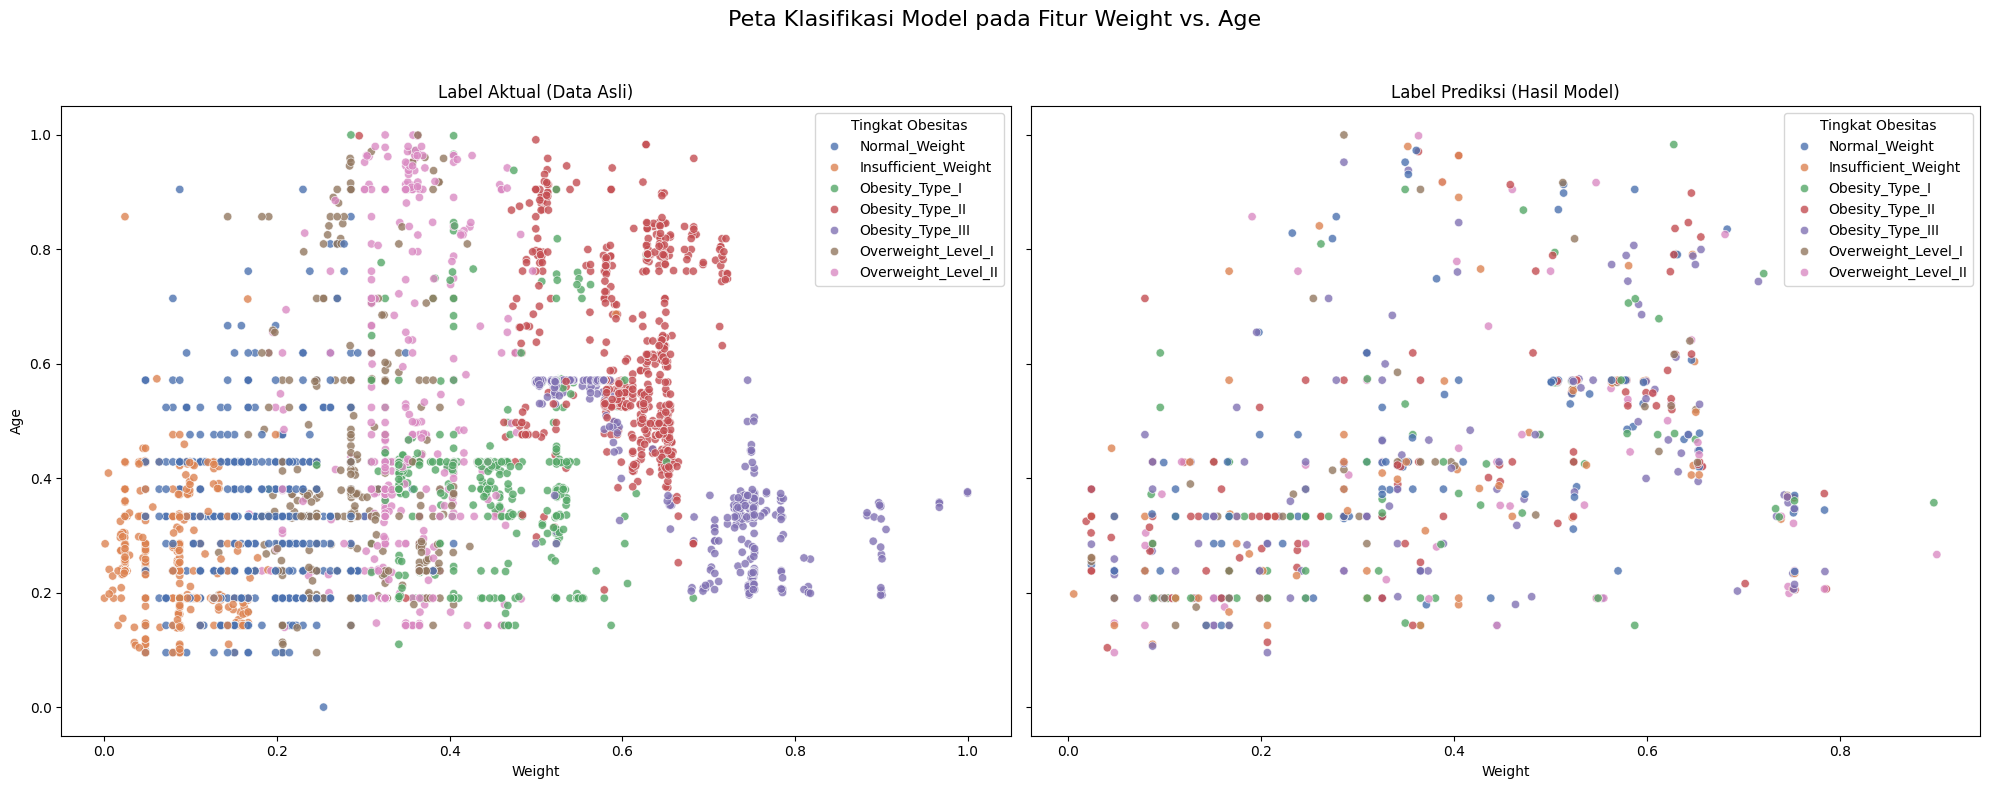

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
fig.suptitle('Peta Klasifikasi Model pada Fitur Weight vs. Age', fontsize=16)

# Scatter plot untuk Label Aktual
sns.scatterplot(ax=axes[0], x=X_test['Weight'], y=X_test['Age'], hue=y_test_labels, palette='deep', alpha=0.8, hue_order=order)
axes[0].set_title('Label Aktual (Data Asli)')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Age')
axes[0].legend(title='Tingkat Obesitas')

# Scatter plot untuk Label Prediksi
sns.scatterplot(ax=axes[1], x=X_test['Weight'], y=X_test['Age'], hue=y_pred_labels, palette='deep', alpha=0.8, hue_order=order)
axes[1].set_title('Label Prediksi (Hasil Model)')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('') # Sembunyikan label y karena sama
axes[1].legend(title='Tingkat Obesitas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 3.2 SVM

### Note

* Note 1

Pilih Dataset yang Tepat (SANGAT PENTING)
Untuk model SVM, Anda harus menggunakan dataset yang fiturnya sudah diskalakan. Oleh karena itu, dataset yang akan kita gunakan adalah df_encoded_standardized

Mengapa ini wajib?

1. SVM bekerja dengan mencari jarak optimal antar kelas. Jika skala fitur Anda



sangat berbeda (misalnya, Age bernilai puluhan sementara Weight bernilai ratusan), fitur dengan skala yang lebih besar akan mendominasi perhitungan jarak.
2. Standardisasi (menggunakan StandardScaler) akan mengubah semua fitur sehingga memiliki rata-rata 0 dan standar deviasi 1. Ini memastikan semua fitur diperlakukan secara "adil" oleh model, sehingga SVM dapat bekerja secara optimal.

* Note 2

Alasan utama kita tidak boleh men-scaling variabel target (y) dalam kasus klasifikasi adalah karena y bukanlah nilai numerik yang berkelanjutan, melainkan sebuah label atau identifier untuk sebuah kategori.

Mari kita gunakan analogi sederhana: bayangkan nomor punggung pada seragam pemain sepak bola.

Pemain #7 (Ronaldo), #10 (Messi), dan #1 (Kiper).
Angka 10 tidak berarti pemain itu "lima kali lebih hebat" dari pemain #2. Angka itu hanyalah sebuah label untuk mengidentifikasi pemain tersebut.
Melakukan scaling (misalnya, mengubah [1, 7, 10] menjadi [0, 0.6, 1.0]) sama sekali tidak masuk akal dan menghilangkan makna aslinya. Hal yang sama berlaku untuk variabel target Anda.

Berikut adalah tiga alasan teknisnya:

1. Label Adalah Identifier, Bukan Nilai Kuantitatif
Nilai 0, 1, 2, ... 6 pada kolom target Anda setelah di-encode hanyalah sebuah "kode" atau "nama panggilan" untuk kategori aslinya (Normal_Weight, Obesity_Type_I, dll).

Tidak ada hubungan matematis di antara mereka. Obesity_Type_I (label 2) bukan berarti "dua kali lipat" dari Insufficient_Weight (label 1).
Scaling memperlakukan angka-angka ini seolah-olah mereka adalah nilai kuantitatif yang bisa diukur, yang mana salah. Ini akan memberikan informasi yang menyesatkan kepada model.
2. Merusak Cara Kerja Algoritma Klasifikasi
Model klasifikasi di Scikit-learn (seperti SVC, RandomForestClassifier, dll.) secara spesifik dirancang untuk bekerja dengan variabel target yang berupa integer diskrit (0, 1, 2, ...).

Fungsi Loss: Perhitungan error atau loss (seperti cross-entropy) membandingkan prediksi probabilitas model dengan label integer yang sebenarnya. Jika Anda memberikan label dalam bentuk float (misal, 0.875), fungsi ini akan gagal.
Output Model: Model akan mengeluarkan prediksi dalam bentuk integer (misalnya, model.predict() akan menghasilkan 2). Bagaimana cara membandingkan prediksi 2 dengan target 0.875? Ini akan menyebabkan error atau hasil yang tidak terduga.
3. Scaling Hanya Diperlukan untuk Fitur (X)
Tujuan utama scaling adalah untuk membantu proses learning atau training model.

Kita men-scaling fitur (X) agar tidak ada satu fitur pun yang mendominasi proses pembelajaran hanya karena rentang nilainya lebih besar. Ini memastikan algoritma (terutama yang berbasis jarak seperti SVM) dapat belajar dari semua fitur secara adil.
Target (y) adalah "kunci jawaban" atau ground truth. Model belajar dari X untuk bisa menebak y. Kita tidak perlu mengubah "kunci jawaban"-nya.
Kapan y Boleh di-Scaling?
Penting untuk dicatat bahwa aturan ini berlaku untuk KLASIFIKASI.

Dalam kasus REGRESI (di mana targetnya adalah nilai numerik berkelanjutan, seperti memprediksi harga rumah atau suhu), men-scaling variabel target y terkadang bisa menjadi teknik yang berguna untuk membantu beberapa model belajar lebih baik.

Kesimpulan untuk kasus Anda: Biarkan y dalam bentuk integer hasil encoding (0, 1, 2, ...). Scaling hanya dan harus diterapkan pada fitur (X).


### 3.2.1 Data Train & Modelling SVM

Langkah 1: Pisahkan Fitur (X) dan Target (y)
Proses ini sama seperti sebelumnya. Kita akan memisahkan fitur yang sudah distandardisasi (X) dari kolom target (y).



In [ ]:
# Pastikan Anda menggunakan dataframe yang sudah distandardisasi
# Asumsi: Kolom target 'NObeyesdad' tidak ikut distandardisasi. Jika ya, ambil 'y' dari df_encoded
X = df_encoded_standardized_no_id.drop('0be1dad', axis=1) # Semua kolom fitur yang sudah di-scaling,iqr dan encoded
y = df_encoded_no_id['0be1dad']                  # Kolom target yang sudah di-encode (TIDAK di-scaling)

# Catatan: Sangat direkomendasikan untuk tidak men-scaling variabel target (y)

Langkah 2: Bagi Data Menjadi Data Latih dan Data Uji
Kita akan menggunakan train_test_split lagi dengan random_state yang sama. Ini sangat penting agar kita bisa membandingkan kinerja SVM dengan Random Forest secara adil, karena keduanya diuji pada data yang sama persis.

In [ ]:
from sklearn.model_selection import train_test_split

# Gunakan random_state=42 agar pembagian datanya sama seperti sebelumnya
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Langkah 3: Buat dan Latih Model SVM (Versi Dasar)
Sekarang kita akan membuat model SVM. Kita akan menggunakan SVC (Support Vector Classifier) dari Scikit-learn.

In [ ]:
from sklearn.svm import SVC

# 1. Membuat objek model SVM
# kernel='rbf' adalah pilihan default yang sangat baik untuk data non-linear
# probability=True penting agar kita bisa menghitung skor AUC nanti
# random_state=42 untuk hasil yang konsisten
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# 2. Melatih model dengan data latih yang sudah di-scaling
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

### 3.2.1 Prediksi data uji & Evaluasi

              EVALUASI LENGKAP - SUPPORT VECTOR MACHINE (SVM)
✅ Akurasi      : 82.93%
✅ Presisi (Avg): 80.69%
✅ Recall (Avg) : 80.70%
✅ F1-Score (Avg): 80.67%

✅ AUC Score    : 0.9726

Laporan Klasifikasi Rinci (per Kelas):
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       613
           1       0.85      0.88      0.86       503
           2       0.79      0.77      0.78       483
           3       0.93      0.97      0.95       612
           4       0.99      1.00      1.00       809
           5       0.65      0.61      0.63       455
           6       0.69      0.66      0.67       461

    accuracy                           0.83      3936
   macro avg       0.81      0.81      0.81      3936
weighted avg       0.83      0.83      0.83      3936


Confusion Matrix:


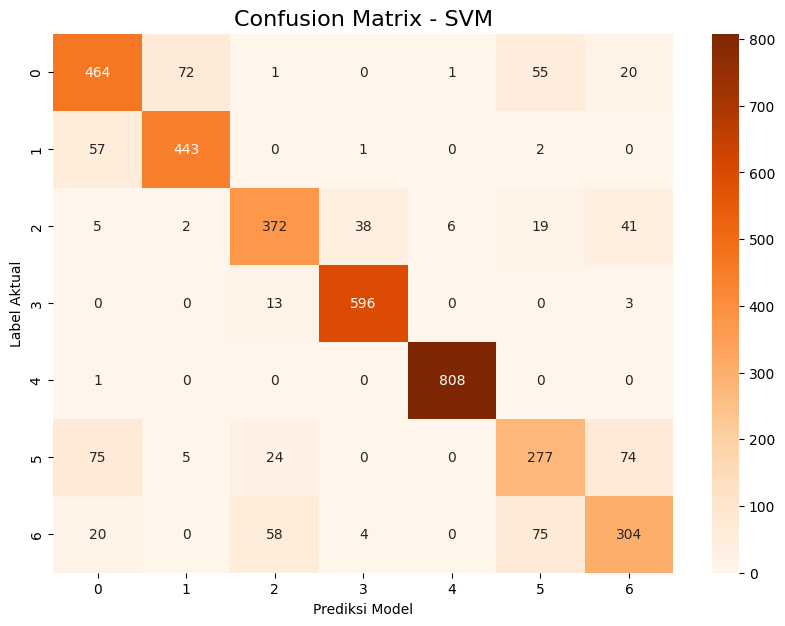

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             roc_auc_score,
                             precision_score,
                             recall_score,
                             f1_score)

# ==============================================================================
# 1. LAKUKAN PREDIKSI MENGGUNAKAN MODEL SVM
# ==============================================================================
# Prediksi kelas
y_pred_svm = svm_model.predict(X_test)

# Prediksi probabilitas (untuk AUC)
y_pred_proba_svm = svm_model.predict_proba(X_test)


# ==============================================================================
# 2. EVALUASI KINERJA SECARA MENYELURUH
# ==============================================================================
print("="*60)
print("              EVALUASI LENGKAP - SUPPORT VECTOR MACHINE (SVM)")
print("="*60)

# a. Metrik Utama
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f"✅ Akurasi      : {accuracy_svm:.2%}")
print(f"✅ Presisi (Avg): {precision_svm:.2%}")
print(f"✅ Recall (Avg) : {recall_svm:.2%}")
print(f"✅ F1-Score (Avg): {f1_svm:.2%}\n")

# b. AUC Score
auc_svm = roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr', average='macro')
print(f"✅ AUC Score    : {auc_svm:.4f}\n")

# c. Laporan Klasifikasi Rinci per Kelas
print("Laporan Klasifikasi Rinci (per Kelas):")
print(classification_report(y_test, y_pred_svm))

# d. Confusion Matrix
print("\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges') # Menggunakan warna berbeda
plt.title('Confusion Matrix - SVM', fontsize=16)
plt.xlabel('Prediksi Model')
plt.ylabel('Label Aktual')
plt.show()

### 3.2.3 Visualisasi

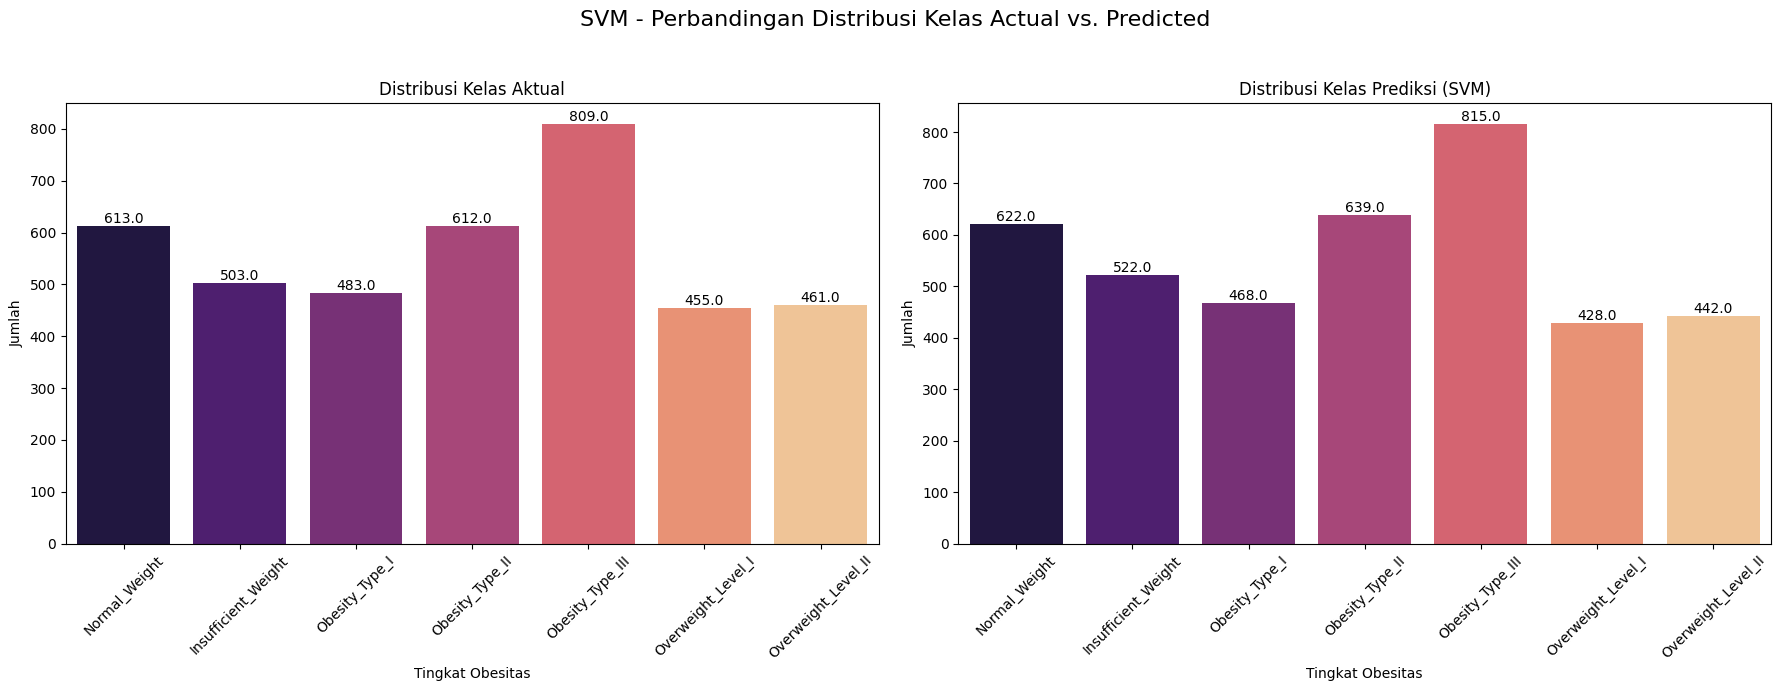

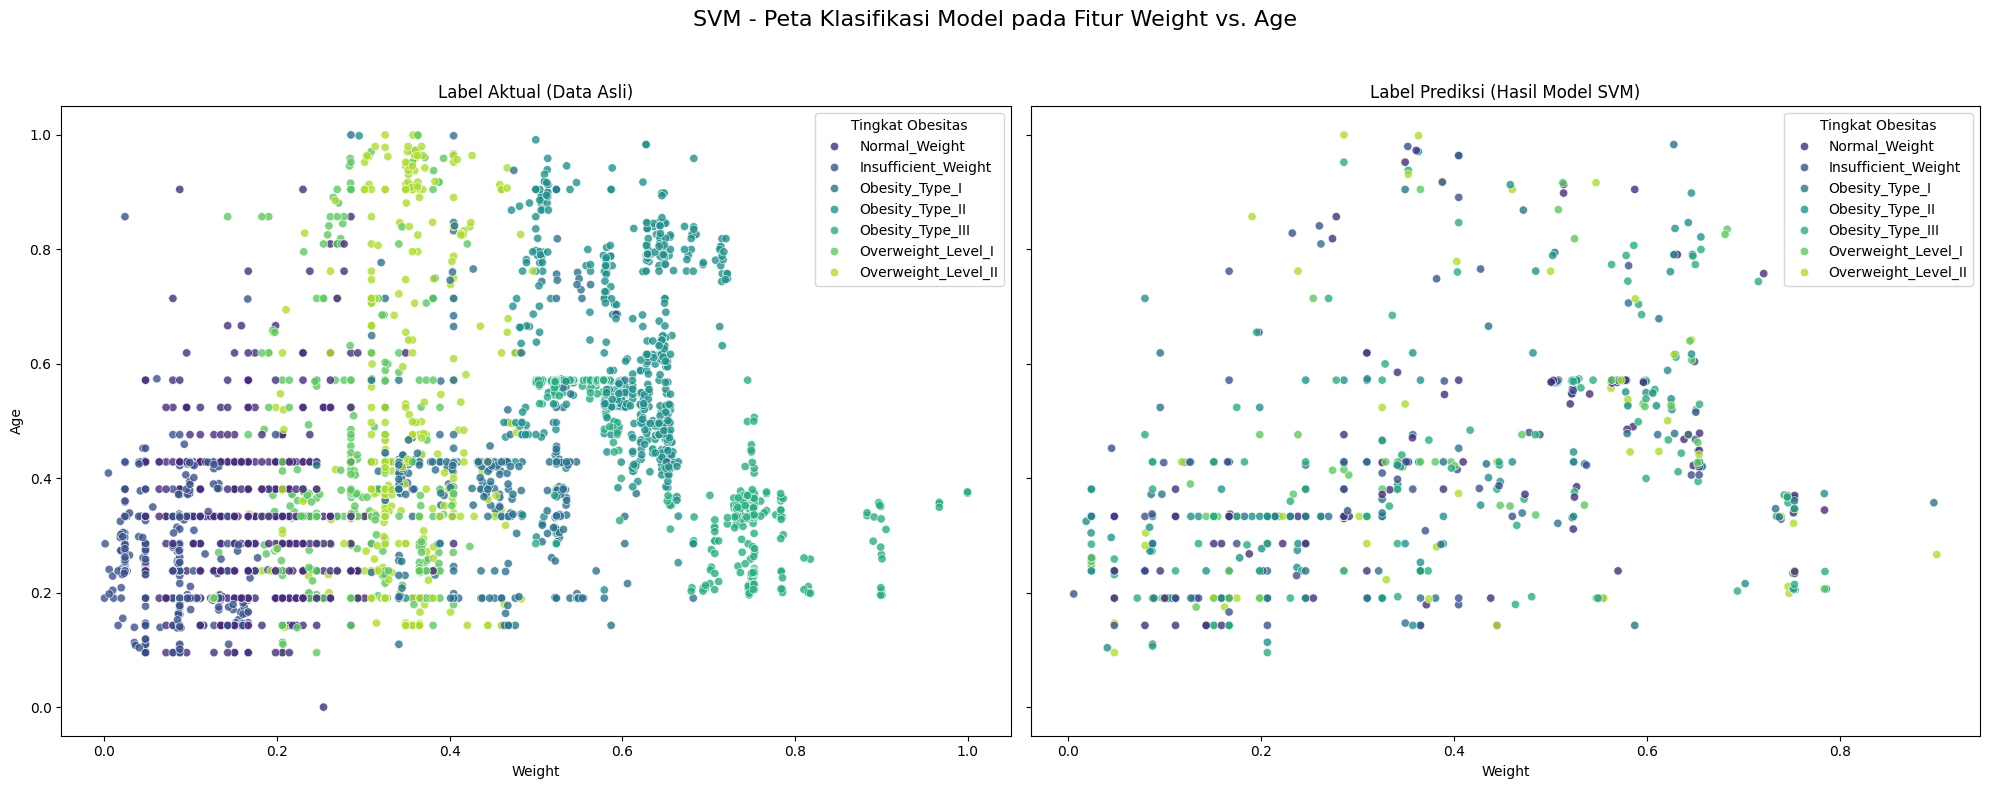

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# 1. PERSIAPKAN LABEL MAPPING (SAMA SEPERTI SEBELUMNYA)
# ==============================================================================
# Pastikan mapping ini sudah sesuai dengan urutan .classes_ dari encoder Anda
label_mapping = {
    0: 'Normal_Weight',
    1: 'Insufficient_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}

# --- Mengubah data numerik menjadi teks yang bisa dibaca ---
# y_test_labels dibuat dari y_test (data aktual)
# y_pred_labels_svm dibuat dari y_pred_svm (prediksi model SVM)
y_test_labels = pd.Series(y_test).map(label_mapping)
y_pred_labels_svm = pd.Series(y_pred_svm).map(label_mapping)

# ==============================================================================
# 2. VISUALISASI 1: PERBANDINGAN DISTRIBUSI KELAS (SVM)
# ==============================================================================
# Menentukan urutan kelas agar konsisten
order = list(label_mapping.values())

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('SVM - Perbandingan Distribusi Kelas Actual vs. Predicted', fontsize=16)

# Plot Aktual (sama untuk semua model)
sns.countplot(ax=axes[0], x=y_test_labels, palette='magma', order=order)
axes[0].set_title('Distribusi Kelas Aktual')
axes[0].set_xlabel('Tingkat Obesitas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Plot Prediksi SVM
sns.countplot(ax=axes[1], x=y_pred_labels_svm, palette='magma', order=order)
axes[1].set_title('Distribusi Kelas Prediksi (SVM)')
axes[1].set_xlabel('Tingkat Obesitas')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ==============================================================================
# 3. VISUALISASI 2: PETA KESALAHAN PREDIKSI (SVM)
# ==============================================================================
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
fig.suptitle('SVM - Peta Klasifikasi Model pada Fitur Weight vs. Age', fontsize=16)

# Scatter plot Aktual (sama untuk semua model)
sns.scatterplot(ax=axes[0], x=X_test['Weight'], y=X_test['Age'], hue=y_test_labels, palette='viridis', alpha=0.8, hue_order=order)
axes[0].set_title('Label Aktual (Data Asli)')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Age')
axes[0].legend(title='Tingkat Obesitas')

# Scatter plot Prediksi SVM
sns.scatterplot(ax=axes[1], x=X_test['Weight'], y=X_test['Age'], hue=y_pred_labels_svm, palette='viridis', alpha=0.8, hue_order=order)
axes[1].set_title('Label Prediksi (Hasil Model SVM)')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('')
axes[1].legend(title='Tingkat Obesitas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Perbandingan Model

             Tabel Perbandingan Kinerja Model
               Accuracy  Precision    Recall  F1-Score  AUC Score
Random Forest  0.896596   0.883765  0.882321  0.882809   0.986278
SVM            0.829268   0.806944  0.806955  0.806682   0.972642


(0.0, 1.1)

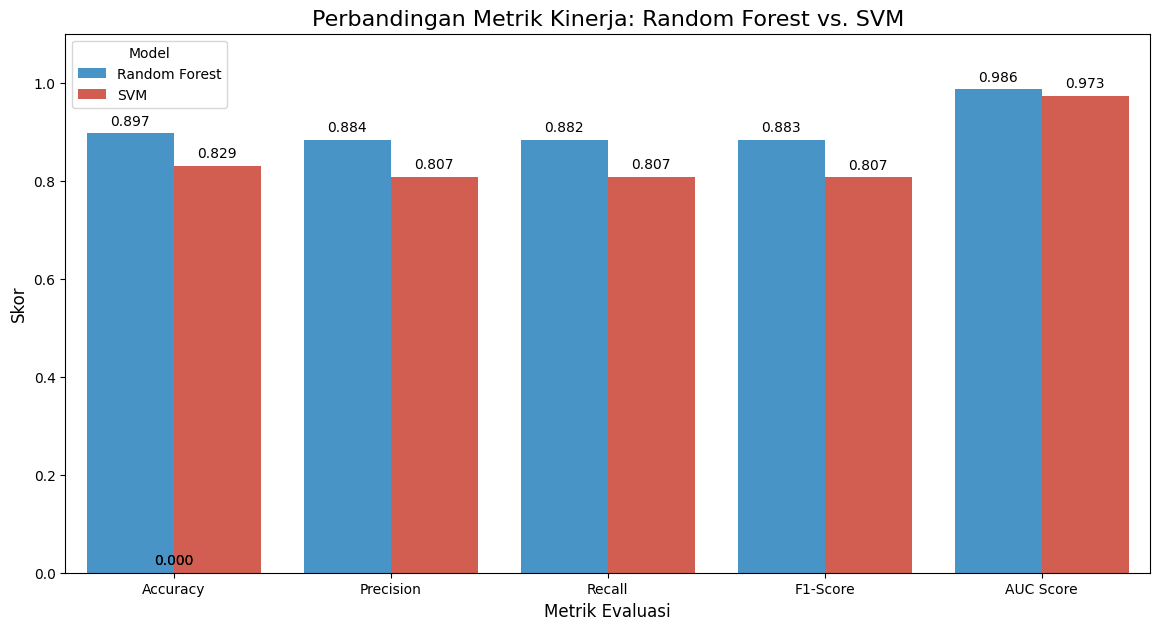

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ==============================================================================
# 1. PASTIKAN SEMUA VARIABEL INI SUDAH ADA
# ==============================================================================
# y_test            : Label aktual dari data uji
# y_pred            : Prediksi dari Random Forest
# y_pred_proba      : Probabilitas prediksi dari Random Forest
# y_pred_svm        : Prediksi dari SVM
# y_pred_proba_svm  : Probabilitas prediksi dari SVM
# ==============================================================================


# 2. KUMPULKAN METRIK UNTUK SETIAP MODEL
# ==============================================================================

# Metrik untuk Random Forest
metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1-Score": f1_score(y_test, y_pred, average='macro'),
    "AUC Score": roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
}

# Metrik untuk SVM
metrics_svm = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, average='macro'),
    "Recall": recall_score(y_test, y_pred_svm, average='macro'),
    "F1-Score": f1_score(y_test, y_pred_svm, average='macro'),
    "AUC Score": roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr', average='macro')
}

# ==============================================================================
# 3. BUAT TABEL PERBANDINGAN (DATAFRAME)
# ==============================================================================

# Gabungkan hasil metrik ke dalam satu DataFrame
comparison_df = pd.DataFrame({
    'Random Forest': metrics_rf,
    'SVM': metrics_svm
}).T # Gunakan .T untuk transpose (membalik baris dan kolom)

# Tampilkan tabel perbandingan
print("="*60)
print("             Tabel Perbandingan Kinerja Model")
print("="*60)
print(comparison_df)


# ==============================================================================
# 4. BUAT VISUALISASI PERBANDINGAN
# ==============================================================================

# Siapkan data untuk plot
plot_df = comparison_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
plot_df.rename(columns={'index': 'Model'}, inplace=True)

# Buat bar chart
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=plot_df, x='Metric', y='Score', hue='Model', palette=['#3498db', '#e74c3c'])

# Tambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.title('Perbandingan Metrik Kinerja: Random Forest vs. SVM', fontsize=16)
plt.xlabel('Metrik Evaluasi', fontsize=12)
plt.ylabel('Skor', fontsize=12)
plt.ylim(0, 1.1) # Atur limit sumbu y agar

Kesimpulan : Dilihat dari grafik model random forest lebih baik, jadi kami akan gunakan random forest untuk deploy

# 5. Deployment

## Simpan Model & Preprocessing standarisasi ke file

In [ ]:
import joblib

# 1. Tentukan nama file untuk menyimpan model
nama_file_model = 'random_forest_obesity_model.joblib'

# 2. Simpan objek model (rf_model) ke dalam file
joblib.dump(rf_model, nama_file_model)

print(f"Model berhasil disimpan ke dalam file bernama: {nama_file_model}")

Model berhasil disimpan ke dalam file bernama: random_forest_obesity_model.joblib


In [ ]:
# Muat model dari file
loaded_model = joblib.load(nama_file_model)
print("Model berhasil dimuat kembali dari file.")

# Anda bisa coba gunakan 'loaded_model' untuk prediksi pada satu sampel data
# (contohnya, baris pertama dari X_test)
sample_prediction = loaded_model.predict(X_test.iloc[[0]])
print(f"Contoh hasil prediksi dari model yang dimuat: {sample_prediction}")

Model berhasil dimuat kembali dari file.
Contoh hasil prediksi dari model yang dimuat: [6]


In [ ]:
import joblib

# ASUMSI: Anda memiliki variabel-variabel ini di notebook Anda
# - 'scaler'     : objek StandardScaler/MinMaxScaler yang sudah di-fit
# - 'encoders'   : sebuah dictionary berisi semua LabelEncoder untuk fitur X
# - 'le_target'  : objek LabelEncoder untuk target y

# Jika Anda tidak memiliki dictionary 'encoders', tidak apa-apa.
# Fokus utama adalah menyimpan 'scaler'.

# 1. Buat sebuah dictionary untuk menampung semua objek
#    (Sesuaikan isinya dengan nama variabel yang Anda gunakan)
preprocessing_objects = {
    'scaler': scaler,
    # ='feature_encoders': encoders, # Hapus komentar jika Anda punya dictionary ini
    # 'target_encoder': le_target  # Hapus komentar jika Anda punya encoder untuk target
}

# 2. Tentukan nama file
nama_file_preprocessing = 'preprocessing_objects.joblib'

# 3. Simpan dictionary tersebut ke dalam satu file joblib
joblib.dump(preprocessing_objects, nama_file_preprocessing)

print(f"Objek preprocessing berhasil disimpan ke dalam file: {nama_file_preprocessing}")

Objek preprocessing berhasil disimpan ke dalam file: preprocessing_objects.joblib


In [ ]:
# Muat dictionary objek dari file
loaded_preprocessing = joblib.load(nama_file_preprocessing)

# Lihat kunci apa saja yang tersimpan di dalamnya
print("\nObjek yang berhasil dimuat:")
print(loaded_preprocessing.keys())

# Anda bahkan bisa melihat detail scaler yang tersimpan
#print("\nContoh: Rata-rata (mean) yang tersimpan di dalam scaler:")
# print(loaded_preprocessing['scaler'].mean_) # Ini akan menampilkan nilai mean dari scaler Anda


Objek yang berhasil dimuat:
dict_keys(['scaler'])


## Encoding ulang agar rapih dan test preprocessing yang disimpan

### Langkah 1: Definisikan Semua Aturan Encoding Anda
Pertama, kita perlu mendefinisikan "kamus" atau pemetaan untuk setiap fitur kategorikal secara eksplisit. Ini memastikan konsistensi.

PENTING: Verifikasi kembali pemetaan ini agar sesuai dengan data Anda.

In [ ]:
# Definisikan pemetaan untuk setiap fitur kategorikal
gender_map = {'Female': 0, 'Male': 1}
caec_map = {'0': 3, 'Frequently': 1, 'Sometimes': 2, 'Always': 0}
calc_map = {'0': 2, 'Frequently': 1, 'Sometimes': 0, } # Sesuaikan jika beda
mtrans_map = {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}

# Definisikan juga daftar kolom numerik dan kategorikal
# (sesuai dengan urutan saat melatih model)
numerical_cols = [
    'Age', 'Height', 'Weight', 'family_history_with_overweight',
    'FAVC',
    'FCVC',
    'NCP',
    'SMOKE',
    'CH2O',
    'SCC',
    'FAF',
    'TUE'
]
categorical_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', ]
# Pastikan urutan kolom ini sama persis dengan urutan kolom pada X_train Anda
feature_order = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
                 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']

### Langkah 2: Buat Fungsi Preprocessing
Fungsi ini akan menerima input mentah dari pengguna dan mengeluarkan data yang siap dimasukkan ke model.

In [ ]:
import pandas as pd
import joblib

def preprocess_new_data(input_data):
    """
    Menerima input data dalam bentuk dictionary,
    melakukan encoding dan scaling,
    dan mengembalikan data yang siap untuk prediksi.
    """
    # Muat objek scaler yang sudah disimpan
    loaded_preprocessing = joblib.load('preprocessing_objects.joblib')
    scaler = loaded_preprocessing['scaler']

    # Ubah input dictionary menjadi DataFrame pandas
    df = pd.DataFrame([input_data])

    # --- Encoding ---
    # Terapkan pemetaan pada setiap kolom kategorikal
    df['Gender'] = df['Gender'].map(gender_map)
    df['CAEC'] = df['CAEC'].map(caec_map)
    df['CALC'] = df['CALC'].map(calc_map)
    df['MTRANS'] = df['MTRANS'].map(mtrans_map)

    # --- Scaling ---
    # Terapkan scaler HANYA pada kolom numerik
    df[numerical_cols] = scaler.transform(df[numerical_cols])

    # --- Atur Ulang Urutan Kolom ---
    # Pastikan urutan kolom sama persis seperti saat pelatihan
    df = df[feature_order]

    return df

### Langkah 3: Contoh Penggunaan Fungsi
Sekarang, Anda bisa menguji fungsi ini dengan data sampel.

In [ ]:
# Buat contoh data input mentah seolah-olah dari pengguna
sample_input = {
    'Age': 25,
    'Gender': 'Male',
    'Height': 1.80,
    'Weight': 80,
    'family_history_with_overweight': 0,
    'FAVC': 1,
    'FCVC': 2,
    'NCP': 3,
    'CAEC': 'Sometimes',
    'SMOKE': 1,
    'CH2O': 2,
    'SCC': 0,
    'FAF': 1,
    'TUE': 2,
    'CALC': 'Frequently',
    'MTRANS': 'Public_Transportation'
}

# Proses data sampel menggunakan fungsi baru Anda
processed_data = preprocess_new_data(sample_input)

print("Data mentah:")
print(sample_input)
print("\nData setelah diproses (siap untuk model):")
print(processed_data)

# Sekarang Anda bisa melakukan prediksi
# model = joblib.load('random_forest_obesity_model.joblib')
# prediction = model.predict(processed_data)
# print(f"\nHasil Prediksi: {prediction}")

Data mentah:
{'Age': 25, 'Gender': 'Male', 'Height': 1.8, 'Weight': 80, 'family_history_with_overweight': 0, 'FAVC': 1, 'FCVC': 2, 'NCP': 3, 'CAEC': 'Sometimes', 'SMOKE': 1, 'CH2O': 2, 'SCC': 0, 'FAF': 1, 'TUE': 2, 'CALC': 'Frequently', 'MTRANS': 'Public_Transportation'}

Data setelah diproses (siap untuk model):
   Gender      Age    Height    Weight  family_history_with_overweight  FAVC  \
0       1  0.52381  0.703651  0.325249                             0.0   1.0   

   FCVC       NCP  CAEC  SMOKE  CH2O  SCC       FAF  TUE  CALC  MTRANS  
0   0.5  0.666667     2    1.0   0.5  0.0  0.333333  1.0     1       3  


## Simpan kode berikut dalam py lalu masukkan ke dalam folder bersama model dan peprocessing yang sudah di save

In [ ]:
%pip install streamlit

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 3s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [ ]:
import streamlit as st
import pandas as pd
import joblib

#================================================================================
# BAGIAN 1: FUNGSI DAN PEMETAAN (SESUAI ATURAN BARU ANDA)
#================================================================================

def preprocess_new_data(input_data):
    """
    Menerima input data dalam bentuk dictionary,
    melakukan encoding dan scaling sesuai aturan baru,
    dan mengembalikan data yang siap untuk prediksi.
    """
    try:
        loaded_preprocessing = joblib.load('preprocessing_objects.joblib')
        scaler = loaded_preprocessing['scaler']
    except FileNotFoundError:
        st.error("File 'preprocessing_objects.joblib' tidak ditemukan.")
        return None

    df = pd.DataFrame([input_data])

    # 1. Definisikan pemetaan sesuai klarifikasi Anda
    gender_map = {'Female': 0, 'Male': 1}
    # Untuk kolom biner, kita akan buat pemetaan terpisah untuk UI
    yes_no_map = {'No': 0, 'Yes': 1}
    # Menggunakan 'No' sebagai representasi user-friendly untuk '0'
    caec_map = {'No': 3, 'Frequently': 1, 'Sometimes': 2, 'Always': 0}
    calc_map = {'No': 2, 'Frequently': 1, 'Sometimes': 0}
    mtrans_map = {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}

    # 2. Definisikan daftar kolom sesuai klarifikasi Anda
    numerical_cols = [
        'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
        'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE'
    ]
    # 'CALC' & 'MTRANS' tidak ada di daftar numerik Anda, jadi tidak di-scale
    feature_order = [
        'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
        'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
        'CALC', 'MTRANS'
    ]

    # 3. Encoding
    # Kolom kategorikal utama
    df['Gender'] = df['Gender'].map(gender_map)
    df['CAEC'] = df['CAEC'].map(caec_map)
    df['CALC'] = df['CALC'].map(calc_map)
    df['MTRANS'] = df['MTRANS'].map(mtrans_map)

    # Ubah kolom biner (Yes/No) menjadi numerik (1/0)
    # sebelum di-scaling bersama kolom numerik lainnya
    df['family_history_with_overweight'] = df['family_history_with_overweight'].map(yes_no_map)
    df['FAVC'] = df['FAVC'].map(yes_no_map)
    df['SMOKE'] = df['SMOKE'].map(yes_no_map)
    df['SCC'] = df['SCC'].map(yes_no_map)

    # 4. Scaling
    # Terapkan scaler HANYA pada daftar numerical_cols yang sudah Anda definisikan
    df[numerical_cols] = scaler.transform(df[numerical_cols])

    # 5. Atur Ulang Urutan Kolom
    df = df[feature_order]

    return df

# Pemetaan untuk menerjemahkan output prediksi (sudah benar dari sebelumnya)
label_mapping_target = {
    0: 'Normal Weight', 1: 'Insufficient Weight', 2: 'Obesity Type I',
    3: 'Obesity Type II', 4: 'Obesity Type III', 5: 'Overweight Level I',
    6: 'Overweight Level II'
}

#================================================================================
# BAGIAN 2: ANTARMUKA APLIKASI STREAMLIT (UI disesuaikan)
#================================================================================

try:
    model = joblib.load('random_forest_obesity_model.joblib')
except FileNotFoundError:
    st.error("File 'random_forest_obesity_model.joblib' tidak ditemukan.")
    model = None

st.title('Prediksi Tingkat Obesitas')
st.write('Aplikasi ini memprediksi tingkat obesitas berdasarkan kebiasaan gaya hidup dan atribut fisik.')

col1, col2 = st.columns(2)

with col1:
    st.header("Atribut Fisik & Riwayat")
    age = st.number_input('Umur (Tahun)', min_value=1, max_value=100, value=25)
    gender = st.selectbox('Jenis Kelamin', ['Male', 'Female'])
    height = st.number_input('Tinggi Badan (meter)', min_value=1.0, max_value=2.5, value=1.75, format="%.2f")
    weight = st.number_input('Berat Badan (kg)', min_value=30.0, max_value=200.0, value=70.0, format="%.1f")
    family_history = st.selectbox('Riwayat obesitas dalam keluarga?', ['Yes', 'No'])

with col2:
    st.header("Kebiasaan Konsumsi")
    favc = st.selectbox('Sering konsumsi makanan tinggi kalori (FAVC)?', ['Yes', 'No'])
    fcvc = st.slider('Frekuensi makan sayur (FCVC)', 1.0, 3.0, 2.0, step=1.0)
    ncp = st.slider('Jumlah makan utama per hari (NCP)', 1.0, 4.0, 3.0, step=1.0)
    # Opsi disesuaikan dengan map Anda
    caec = st.selectbox('Konsumsi makanan di antara waktu makan (ngemil) (CAEC)?', ['No', 'Sometimes', 'Frequently', 'Always'])
    calc = st.selectbox('Konsumsi alkohol (CALC)?', ['No', 'Sometimes', 'Frequently'])
    ch2o = st.slider('Konsumsi air per hari (liter) (CH2O)', 1.0, 3.0, 2.0, step=1.0)

st.header("Aktivitas & Gaya Hidup")
smoke = st.selectbox('Apakah Anda merokok (SMOKE)?', ['Yes', 'No'])
scc = st.selectbox('Konsumsi minuman berkalori (SCC)?', ['Yes', 'No'])
faf = st.slider('Frekuensi aktivitas fisik per minggu (FAF)', 0.0, 3.0, 1.0, step=1.0)
tue = st.slider('Waktu menggunakan gawai per hari (TUE)', 0.0, 2.0, 1.0, step=1.0)
mtrans = st.selectbox('Moda transportasi utama (MTRANS)', ['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'])

if st.button('Prediksi Tingkat Obesitas'):
    if model is not None:
        input_data = {
            'Age': age, 'Gender': gender, 'Height': height, 'Weight': weight,
            'family_history_with_overweight': family_history, 'FAVC': favc,
            'FCVC': fcvc, 'NCP': ncp, 'CAEC': caec, 'SMOKE': smoke,
            'CH2O': ch2o, 'SCC': scc, 'FAF': faf, 'TUE': tue,
            'CALC': calc, 'MTRANS': mtrans
        }
        processed_data = preprocess_new_data(input_data)
        if processed_data is not None:
            prediction_numeric = model.predict(processed_data)[0]
            prediction_text = label_mapping_target[prediction_numeric]
            st.success(f"Hasil Prediksi: **{prediction_text}**")

2025-06-16 05:38:40.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 05:38:40.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 05:38:40.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 05:38:40.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 05:38:40.073 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 05:38:40.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 05:38:40.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 05:38:40.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar